# 1. Modelo SIR

Considere una población con un número constante de personas donde cada una puede estar
susceptible, infectada (casos activos) o retirada. Sean $s$, $i$, $r$ las fracciones de la población que están
susceptibles, infectadas o retiradas, respectivamente $(s+i+r = 1)$. Asumamos que, a cada
momento, la cantidad de susceptibles que se infecta por unidad de tiempo es proporcional a la
cantidad de susceptibles multiplicada por la cantidad de infectados, $\beta s i$, donde $\beta$ es una constante
que nos dice qué tan contagiosa es la enfermedad. Por el contrario, la cantidad de infectados que
dejan de serlo por unidad de tiempo es solamente proporcional al número de infectados, $\gamma i$,
donde $1/\gamma$ da el tiempo característico de recuperación. Las ecuaciones diferenciales acopladas
que rigen el comportamiento son, por lo tanto:
\begin{align}
    \frac{ds}{dt} &= -\beta s i, \\
    \frac{di}{dt} &= \beta s i - \gamma i,\\
    \frac{dr}{dt} &= \gamma i,
\end{align}
de las cuales solo las primeras dos son indepedientes.


## **a.**
Implemente la simulación del modelo utilizando Runge-Kutta para las dos primeras ecuaciones acopladas, y grafique la evolución temporal de las tres cantidades $s(t)$, $i(t)$ y $r(t)$ para $s(0) = 0.999$, $i(0) = 0.001$, $\beta = 0.35$, $\gamma = 0.08$.

In [1]:
# Implementación en python

import numpy as np
import matplotlib.pyplot as plt

beta = 0.35
gamma = 0.08


def F(
    t, x, beta, gamma
):  # x = [s, i, r] # dx/dt = [ds/dt, di/dt, dr/dt] = [-beta*si,beta*s*i-gamma*i,gamma*i]
    return np.array([-beta * x[0] * x[1], (beta * x[0] - gamma) * x[1], gamma * x[1]])


def UnPasoRK4(t, x, dt, beta, gamma):

    dx1 = dt * F(t, x, beta, gamma)
    dx2 = dt * F(t + dt / 2, x + dx1 / 2, beta, gamma)
    dx3 = dt * F(t + dt / 2, x + dx2 / 2, beta, gamma)
    dx4 = dt * F(t + dt, x + dx3, beta, gamma)

    x += (dx1 + 2 * dx2 + 2 * dx3 + dx4) / 6


# Parte principal del codigo

dt = 0.1
ttotal = 10 * (1 / gamma)
datos = []
t = 0

# Condiciones iniciales
x0 = np.array([0.999, 0.001, 0])


def simulacion_rk4(beta, gamma, ttotal):
    dt = 0.1
    datos = []
    t = 0
    x = x0.copy()
    while t < ttotal:
        datos.append([t] + list(x))
        UnPasoRK4(t, x, dt, beta, gamma)
        t += dt
    return np.array(datos)


datos = simulacion_rk4(beta, gamma, ttotal)

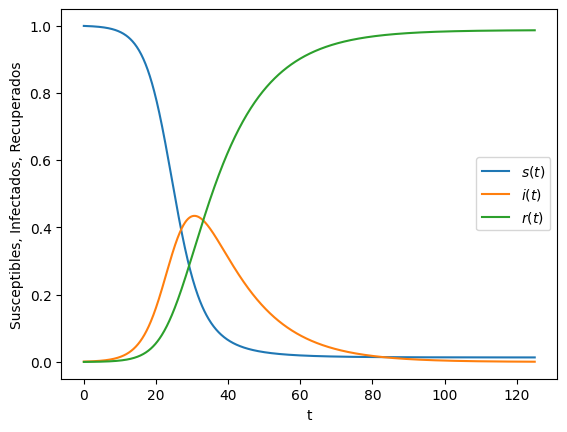

In [2]:
fig, ax = plt.subplots()
ax.plot(datos[:, 0], datos[:, 1], "-", label=r"$s(t)$")
ax.plot(datos[:, 0], datos[:, 2], "-", label=r"$i(t)$")
ax.plot(datos[:, 0], datos[:, 3], "-", label=r"$r(t)$")
ax.legend()
ax.set_xlabel("t")
ax.set_ylabel("Susceptibles, Infectados, Recuperados")
plt.show()

## **b)**

El archivo CoronavirusColombiayBogota.xmls contiene los datos de los casos reportados de Covid-19 para Colombia y para Bogotá.
 * Escoja un grupo de datos (Colombia o Bogotá) y utilice los datos del inicio de la pandemia para deducir una rata de crecimiento diario $a = i(t+1)/i(t)$ e identifique un día en el que este valor ya esté estable. Identifique ese día como el momento inicial de la pandemia $t=0$.
 * Calcule los valores de iniciales como $r = 0$, $s=1-i$ e $ i = I/N$, utilizando el número de casos activos $I$ en ese momento y una población de $N=45,000,000$ para Colombia o $N=8,000,000$ para Bogotá.
 * Luego, considere el siguiente procedimiento, que se puede considerar como si fuera una función $f(\gamma)$: Dado un valor de $\gamma$, calcule $\beta$ a partir de $a$. Con estos valores de $\beta$ y $\gamma$, corra la simulación del modelo SIR. Como resultado de la simulación, calcule el número de días $t_{sim}$, en el que se presenta el pico en la simulación, y defina la función $f(\gamma) =t_{sim} - t_{datos}$ donde $t_{datos}$ es el día en el que ocurre el pico, contado desde el momento inicial.
 * Finalmente, utilice el método de la bisección de esta “función” para identificar el valor de $\gamma$ que predice correctamente el momento de aparición del pico ($f(\gamma) = 0$).

Para calcular $\beta$, consideramos que para un tiempo inicial $t$, $s(t) = s_0$, luego, usando la ec. para los infectados
$$
    \frac{di}{dt} = (\beta s_0 -\gamma)i ⇒ i(t) = i_0 e^{(\beta s_0 - \gamma)t}
$$
de donde $a = i(t+1)/i(t)$ y podemos despejar $\beta = 1/s_0 (\gamma + \ln a)$.

In [3]:
import pandas as pd

filename = "./Coronavirus Colombia y Bogota.xlsx"
df_bog = pd.read_excel(filename, sheet_name="Bogotá").dropna(how="all")
df_col = pd.read_excel(filename, sheet_name="Colombia").dropna(how="all")
df_bog = df_bog[["dias", "Casos Activos"]].dropna(how="any")
df_col = df_col[["dias", "Infectados activos"]].dropna(how="any")

/Users/juanbernate/.pyenv/versions/oqs/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/juanbernate/.pyenv/versions/oqs/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# Datos Colombia

Text(0, 0.5, 'i(t), Infectados activos [%]')

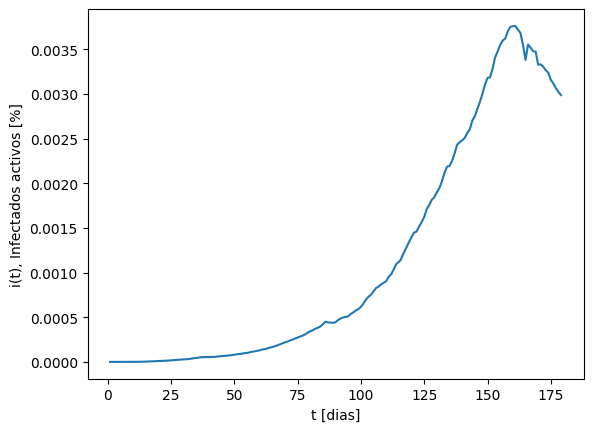

In [4]:
N_col = 45e6

t = df_col["dias"].to_numpy()
i = df_col["Infectados activos"].to_numpy() / N_col

fig, ax = plt.subplots()
ax.plot(t, i)
ax.set_xlabel("t [dias]")
ax.set_ylabel("i(t), Infectados activos [%]")

a0 = 1.0906
a0 (promediado sobre 20 primeros dias) = 1.0286
Condiciones iniciales [s0,i0,r0]:
 [9.999512e-01 4.880000e-05 0.000000e+00]


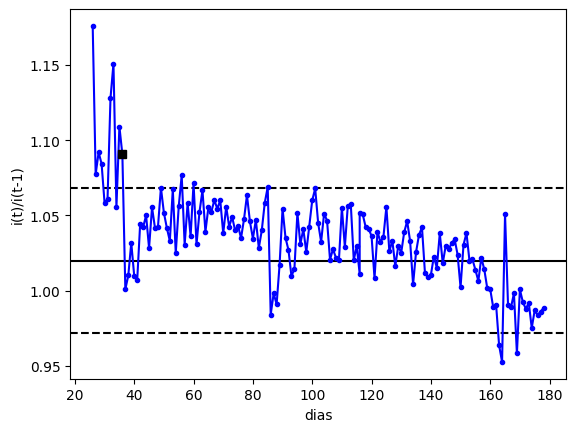

In [5]:
N_col = 45e6

t = df_col["dias"].to_numpy()
i = df_col["Infectados activos"].to_numpy() / N_col

i_ratio = i[1:] / i[:-1]
fig, ax = plt.subplots()
y, dy = np.mean(i_ratio[100:]), 2 * np.std(i_ratio[100:])
ax.axhline(y=y, color="k")
ax.axhline(y=y + dy, color="k", ls="--")
ax.axhline(y=y - dy, color="k", ls="--")
ax.plot(t[25:-1], i_ratio[25:], "b.-")

# Tomamos t = 0 en el dia 40
dia0 = 36
idx_dia0 = np.where(t == dia0)[0][0]
ax.plot([t[idx_dia0]], [i_ratio[idx_dia0]], "ks")
ax.set_xlabel("dias")
ax.set_ylabel("i(t)/i(t-1)")
t = t[idx_dia0:] - t[idx_dia0]
i = i[idx_dia0:]
r0 = 0
i0 = i[0]
s0 = 1 - i0
a0 = i[1] / i[0]
print(f"a0 = {a0:.4f}")
n_dias_prom = 5
a0_prom = np.mean(i[1 : 1 + n_dias_prom] / i[:n_dias_prom])
print(f"a0 (promediado sobre 20 primeros dias) = {a0_prom:.4f}")
x0 = np.array([s0, i0, r0])
print("Condiciones iniciales [s0,i0,r0]:\n", x0)

Gamma: 0.0382
Beta: 0.1250
Pico: 36(dia cero) + 125.1, (datos: 125)


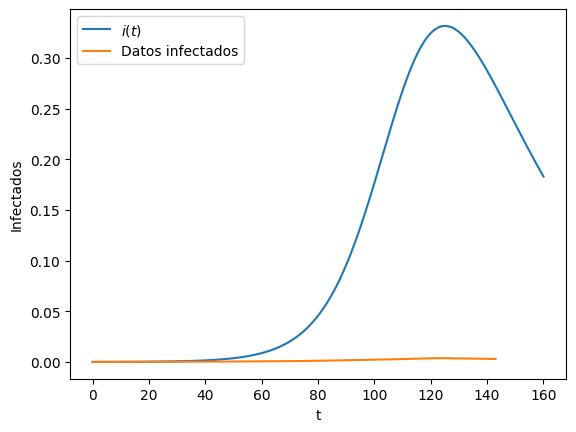

In [6]:
def encuentre_pico_rk4(x0, beta, gamma, ttotal):
    dt = 0.1
    datos = []
    t = 0
    x = x0.copy()
    while t < ttotal:
        datos.append([t] + list(x))
        UnPasoRK4(t, x, dt, beta, gamma)
        t += dt
    datos = np.array(datos)
    indice_max = np.where(datos[:, 2] == np.max(datos[:, 2]))[0][0]
    return datos[indice_max, 0]


t_datos = t[np.where(i == np.max(i))[0][0]]


def calculeBeta(gamma, a0, s0):
    return (gamma + np.log(a0)) / s0


def f(gamma, a0):
    beta = calculeBeta(gamma, a0, s0)
    t_sim = encuentre_pico_rk4(x0, beta, gamma, 2 * t[-1])  # ttotal puede ser t[-1]
    return t_datos - t_sim


ERR = 1e-6


def biseccion(f, xmin, xmax, a0):
    while xmax - xmin > ERR:
        m = 0.5 * (xmax + xmin)
        if f(m, a0) * f(xmin, a0) > 0:
            xmin = m
        else:
            xmax = m
    return 0.5 * (xmin + xmax)


gamma_min = 1 / 50
gamma_max = 1.0
gamma_opt = biseccion(f, gamma_min, gamma_max, a0)
beta_opt = calculeBeta(gamma_opt, a0, s0)
dia_pico = encuentre_pico_rk4(x0, beta_opt, gamma_opt, t[-1])

print(f"Gamma: {gamma_opt:.4f}")
print(f"Beta: {beta_opt:.4f}")
print(f"Pico: {dia0:.0f}(dia cero) + {dia_pico:.1f}, (datos: {t_datos:.0f})")


def simulacion_rk4(beta, gamma, ttotal):
    dt = 0.1
    datos = []
    t = 0
    x = x0.copy()
    while t < ttotal:
        datos.append([t] + list(x))
        UnPasoRK4(t, x, dt, beta, gamma)
        t += dt
    datos = np.array(datos)
    return datos


datos = simulacion_rk4(beta_opt, gamma_opt, 160)

# Graficar

fig, ax = plt.subplots()
ax.plot(datos[:, 0], datos[:, 2], "-", label=r"$i(t)$")
ax.plot(t, i, "-", label=r"Datos infectados")
ax.legend()
ax.set_xlabel("t")
ax.set_ylabel("Infectados")
plt.show()

# Datos Bogotá



Dia 0: 37
a0 = 1.0282
Condiciones iniciales [s0,i0,r0]:
 [9.99866875e-01 1.33125000e-04 0.00000000e+00]


Text(0, 0.5, 'i(t)/i(t-1)')

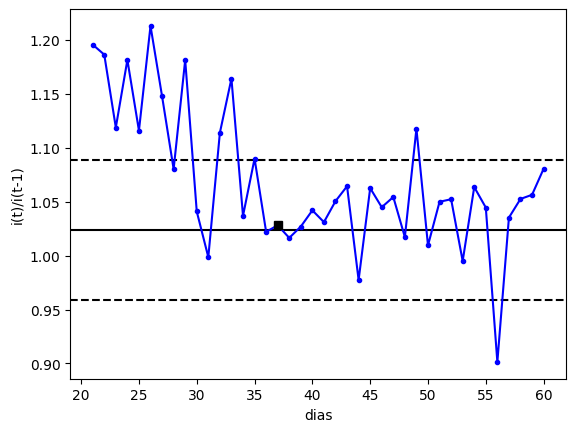

In [7]:
N_bog = 8e6

t = df_bog["dias"].to_numpy()
ttotal = t[-1]
i = df_bog["Casos Activos"].to_numpy() / N_bog

i_ratio = i[1:] / i[:-1]
fig, ax = plt.subplots()
y, dy = np.mean(i_ratio[100:]), 2 * np.std(i_ratio[100:])
# Grafica el promedio +/- 2 desviaciones
ax.axhline(y=y, color="k")
ax.axhline(y=y + dy, color="k", ls="--")
ax.axhline(y=y - dy, color="k", ls="--")
ax.plot(t[20:60], i_ratio[20:60], "b.-")

# Tomamos t = 0 en el dia 40
dia0 = 37


def condicionesInicialesDia0(dia0):
    print(f"Dia 0: {dia0}")
    idx_dia0 = np.where(t == dia0)[0][0]
    r0 = 0
    i0 = i[idx_dia0]
    s0 = 1 - i0
    a0 = i[idx_dia0 + 1] / i[idx_dia0]
    print(f"a0 = {a0:.4f}")
    x0 = np.array([s0, i0, r0])
    print("Condiciones iniciales [s0,i0,r0]:\n", x0)
    return idx_dia0, a0, x0


idx_dia0, a0, x0 = condicionesInicialesDia0(dia0)
ax.plot([t[idx_dia0]], [i_ratio[idx_dia0]], "ks")
ax.set_xlabel("dias")
ax.set_ylabel("i(t)/i(t-1)")

Dia 0: 33
a0 = 1.1641
Condiciones iniciales [s0,i0,r0]:
 [9.99901e-01 9.90000e-05 0.00000e+00]
Gamma optimo: 2.0000
Beta optimo: 2.1521
Pico: 33(dia cero) + 30.3 (datos: 159)
---------------------------------------------

Dia 0: 34
a0 = 1.0369
Condiciones iniciales [s0,i0,r0]:
 [9.9988475e-01 1.1525000e-04 0.0000000e+00]
Gamma optimo: 0.4560
Beta optimo: 0.4922
Pico: 34(dia cero) + 125.1 (datos: 159)
---------------------------------------------

Dia 0: 35
a0 = 1.0900
Condiciones iniciales [s0,i0,r0]:
 [9.998805e-01 1.195000e-04 0.000000e+00]
Gamma optimo: 0.0197
Beta optimo: 0.1058
Pico: 35(dia cero) + 124.1 (datos: 159)
---------------------------------------------

Dia 0: 36
a0 = 1.0221
Condiciones iniciales [s0,i0,r0]:
 [9.9986975e-01 1.3025000e-04 0.0000000e+00]
Gamma optimo: 0.6292
Beta optimo: 0.6511
Pico: 36(dia cero) + 123.1 (datos: 159)
---------------------------------------------

Dia 0: 37
a0 = 1.0282
Condiciones iniciales [s0,i0,r0]:
 [9.99866875e-01 1.33125000e-04 0.0000

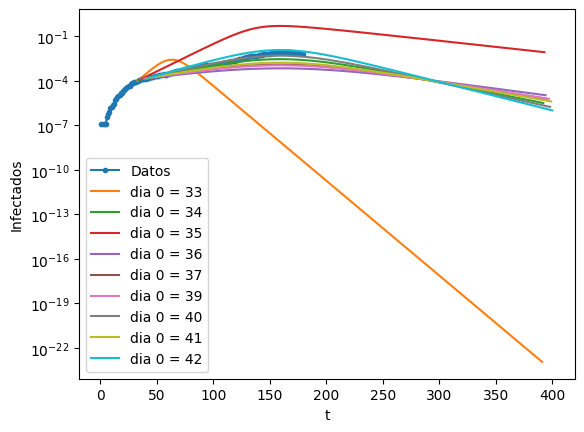

In [8]:
def simulacion_rk4(x0, beta, gamma, ttotal):
    dt = 0.1
    datos = []
    t = 0
    x = x0.copy()
    while t < ttotal:
        datos.append([t] + list(x))
        UnPasoRK4(t, x, dt, beta, gamma)
        t += dt
    return np.array(datos)


def encuentre_pico_rk4(x0, beta, gamma, ttotal):
    datos = simulacion_rk4(x0, beta, gamma, ttotal)
    indice_max = np.where(datos[:, 2] == np.max(datos[:, 2]))[0][0]
    return datos[indice_max, 0]


def calculeBeta(gamma, a0, s0):
    return (gamma + np.log(a0)) / s0


tPico_datos = t[np.where(i == np.max(i))[0][0]]


def f(gamma, a0, x0, idx_dia0):
    beta = calculeBeta(gamma, a0, x0[0])
    tPico_sim = encuentre_pico_rk4(x0, beta, gamma, ttotal)
    return (tPico_datos - t[idx_dia0]) - tPico_sim


ERR = 1e-6


def biseccion(f, xmin, xmax):
    while xmax - xmin > ERR:
        m = 0.5 * (xmax + xmin)
        if f(m) * f(xmin) > 0:
            xmin = m
        else:
            xmax = m
    return 0.5 * (xmin + xmax)


fig, ax = plt.subplots()
ax.semilogy(t, i, ".-", label=r"Datos")

gamma_min = 1 / 100
gamma_max = 2.0
for dia0 in [33, 34, 35, 36, 37, 39, 40, 41, 42]:
    idx_dia0, a0, x0 = condicionesInicialesDia0(dia0)
    f_gamma = lambda gamma: f(gamma, a0, x0, idx_dia0)
    gamma_opt = biseccion(f_gamma, gamma_min, gamma_max)
    beta_opt = calculeBeta(gamma_opt, a0, s0)
    dia_pico = encuentre_pico_rk4(x0, beta_opt, gamma_opt, ttotal)

    print(f"Gamma optimo: {gamma_opt:.4f}")
    print(f"Beta optimo: {beta_opt:.4f}")
    print(f"Pico: {dia0:.0f}(dia cero) + {dia_pico:.1f} (datos: {tPico_datos:.0f})")
    print("---------------------------------------------\n")

    datos = simulacion_rk4(x0, beta_opt, gamma_opt, 2 * t[-1])

    # Graficar

    ax.semilogy(datos[:, 0] + t[idx_dia0], datos[:, 2], "-", label=f"dia 0 = {dia0}")
    ax.legend()
    ax.set_xlabel("t")
    ax.set_ylabel("Infectados")
plt.show()

# 2. Modos de vibración de un tambor

Considere la membrana circular de un tambor de radio $a = 1$, e imagine que estamos interesados en los modos
normales $R(r)$ que no dependen de la coordenada angular. En este caso, la
función $R(r)$ cumple la ecuación diferencial:
$$
    r^2 \frac{d^2R}{dr^2} + r \frac{dR}{dr} + \lambda^2r^2R(r) = 0
$$
Que resulta ser una ecuación de Bessel con parámetro $\alpha = 0$, con condiciones de frontera $R(a) = 0$ y $\dfrac{dR}{dr}\bigg|_{r = 0} = 0$.

## **a.**
Construya un programa que resuelva esta ecuación diferencial por Runge-Kutta de 4to orden para $\lambda = 1$, $R(0) = 1$ y $\dfrac{dR}{dr}\bigg|_{r = 0} = 0$, y grafique $R(r)$ en el intervalo $r \in [0.01 , 10.0]$.

La ec. diff. la podemos escribir como:
$$
    R'' = -\frac{1}{r}R'-\lambda^2R(r).
$$

In [9]:
# Implementación en python

import numpy as np
import matplotlib.pyplot as plt

Lambda = 1


def F(r, y, Lambda):  # y = [R', R]
    return np.array([-1 / (r + 1e-8) * y[0] - Lambda**2 * y[1], y[0]])


def UnPasoRK4(r, y, dr, Lambda):

    dy1 = dr * F(r, y, Lambda)
    dy2 = dr * F(r + dr / 2, y + dy1 / 2, Lambda)
    dy3 = dr * F(r + dr / 2, y + dy2 / 2, Lambda)
    dy4 = dr * F(r + dr, y + dy3, Lambda)

    y += (dy1 + 2 * dy2 + 2 * dy3 + dy4) / 6


# Parte principal del codigo

dr = 0.01
rmax = 10.0
datos = []
r = 0.0

# Condiciones iniciales
y = np.array([0.0, 1.0])

while r < rmax:
    datos.append([r] + list(y))
    UnPasoRK4(r, y, dr, Lambda)
    r += dr
datos = np.array(datos)

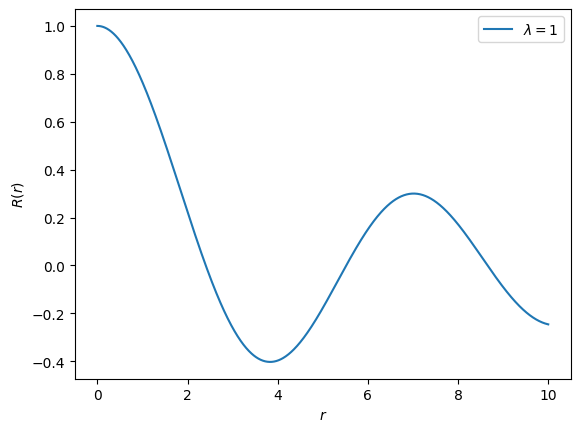

In [10]:
fig, ax = plt.subplots()
ax.plot(datos[:, 0], datos[:, 2], label=r"$\lambda = 1$")
ax.set_xlabel(r"$r$")
ax.set_ylabel(r"$R(r)$")
ax.legend()
plt.show()

## **b.**

Defina la función $f(\lambda) = R(r = 1; \lambda)$ (donde hemos hecho explícito el hecho de que
$R(r)$ también es función del parámetro $\lambda$), grafíquela para $\lambda \in [0.1 , 15.0]$ e identifique
aproximadamente dónde están los ceros de la función en ese intervalo.

In [11]:
def f(Lambda):
    dr = 1e-3
    r = 0.0

    # Condiciones iniciales
    y = np.array([0.0, 1.0])

    while r <= 1.0:
        UnPasoRK4(r, y, dr, Lambda)
        r += dr

    return y[1]


Lambda_vals = np.linspace(0.1, 15.0, 100)
f_Lambda_vals = np.array([f(l) for l in Lambda_vals])

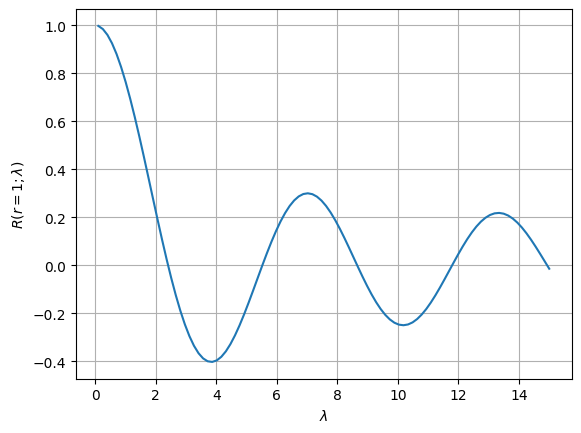

In [12]:
fig, ax = plt.subplots()
ax.plot(Lambda_vals, f_Lambda_vals)
ax.set_ylabel(r"$R(r=1;\lambda$)")
ax.set_xlabel(r"$\lambda$")
ax.grid()

In [13]:
ERR = 1e-6


def biseccion(f, xmin, xmax):
    while xmax - xmin > ERR:
        m = 0.5 * (xmax + xmin)
        if f(m) * f(xmin) > 0:
            xmin = m
        else:
            xmax = m

    return 0.5 * (xmin + xmax)


intervalos = [
    [2, 4],
    [4, 6],
    [8, 10],
    [10, 12],
    [14, 15],
]

ceros = []
for intervalo in intervalos:
    ceros.append(biseccion(f, intervalo[0], intervalo[1]))
ceros

[2.4048256874084473,
 5.520078182220459,
 8.653728008270264,
 11.791533946990967,
 14.930917263031006]

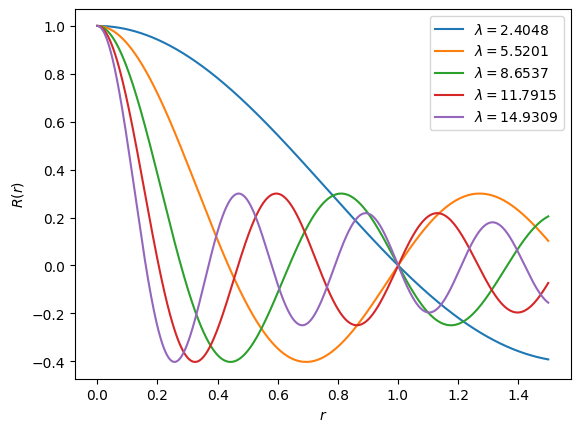

In [14]:
rmax = 1.5
dr = 1e-3
num_r = int(rmax / dr)
datos = np.zeros((num_r, len(ceros)))
for i, Lambda in enumerate(ceros):
    r = 0.0
    y = np.array([0.0, 1.0])
    for j in range(num_r):
        datos[j, i] = y[1]
        UnPasoRK4(r, y, dr, Lambda)
        r += dr
r = np.linspace(0, rmax, num_r)
fig, ax = plt.subplots()
ax.set_xlabel(r"$r$")
ax.set_ylabel(r"$R(r)$")
for i in range(len(ceros)):
    ax.plot(r, datos[:, i], label=rf"$\lambda = {ceros[i]:.4f}$")
ax.legend()

## **d.**

Haga un programa que grafique las funciones de Bessel que son solución teórica de este problema, halle su ceros por bisección y compárelos con los valores que encontró en el punto c.

La solucion exacta está dadas por $R_n(r) = J_0(\lambda_n r)$, que existen para $\lambda = \lambda_n$ correspondiente a los ceros de la funcion de Bessel $J_0(x)$. Para encontrarlos usamos la definición $$J_{\alpha}(x) = \frac{1}{\pi}\int_0^{\pi} \cos[\alpha t - x\sin(t)] dt$$

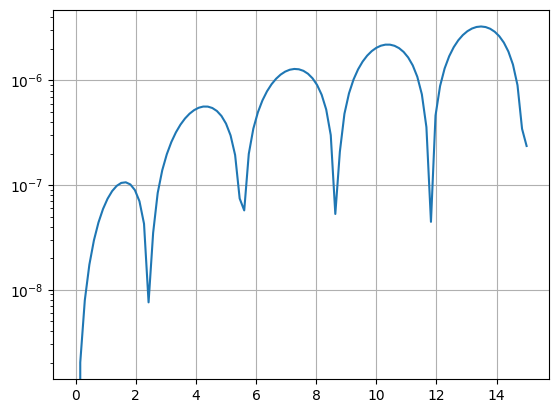

In [15]:
def IntegralSimpson(a, b, n, f):
    n *= 2
    h = (b - a) / n
    suma = f(a) + f(a + n * h)
    for i in range(1, n):
        if i % 2 == 0:
            suma += 2 * f(a + i * h)
        else:
            suma += 4 * f(a + i * h)
    return h / 3 * suma


def Bessel(alpha, x):
    f = lambda t: np.cos(alpha * t - x * np.sin(t))
    n = 20
    return 1 / np.pi * IntegralSimpson(0, np.pi, n, f)


def f_exacta(Lambda):
    return Bessel(0, Lambda)


Lambda = np.linspace(0, 15, 100)
fig, ax = plt.subplots()
ax.semilogy(Lambda, [np.abs(f_exacta(l) - f(l)) for l in Lambda])
ax.grid()

In [16]:
ERR = 1e-7


def biseccion(f, xmin, xmax):
    while xmax - xmin > ERR:
        m = 0.5 * (xmax + xmin)
        if f(m) * f(xmin) > 0:
            xmin = m
        else:
            xmax = m

    return 0.5 * (xmin + xmax)


intervalos = [
    [2, 4],
    [4, 6],
    [8, 10],
    [10, 12],
    [14, 15],
]

ceros_int = []
for intervalo in intervalos:
    ceros_int.append(biseccion(f_exacta, intervalo[0], intervalo[1]))

In [17]:
diff = [ceros[i] - ceros_int[i] for i in range(len(ceros))]
diff

[1.4901161193847656e-07,
 8.940696716308594e-08,
 8.940696716308594e-08,
 -5.066394805908203e-07,
 -4.470348358154297e-07]

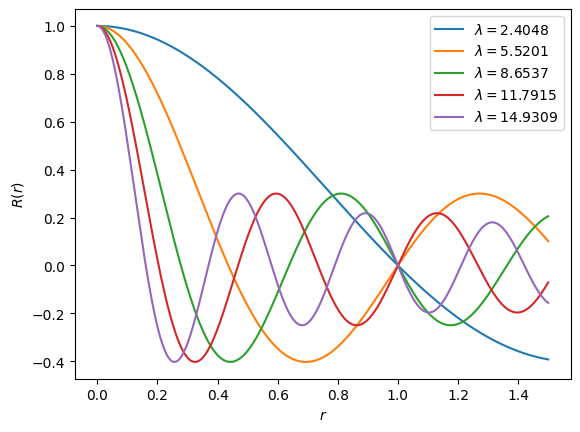

In [18]:
datos = np.zeros((num_r, len(ceros)))
for i in range(len(ceros_int)):
    for j in range(num_r):
        datos[j, i] = Bessel(0.0, ceros_int[i] * r[j])

fig, ax = plt.subplots()
ax.set_xlabel(r"$r$")
ax.set_ylabel(r"$R(r)$")
for i in range(len(ceros)):
    ax.plot(r, datos[:, i], label=rf"$\lambda = {ceros_int[i]:.4f}$")
ax.legend()

# 3. Planteas troyanos

## **a.**
Hemos simulado en clase el movimiento de dos cuerpos celestes. Considere que uno de ellos el Júpiter y el otro es El Sol, cuya masa es $m_0 = 1047$ veces la masa de Júpiter ($m_1 = 1$). Asuma que la distancia entre Júpiter y El Sol es $r = 1000$ y coloque las condiciones iniciales para que el movimiento de los dos cuerpos sea girar en círculos
alrededor de su centro de masa con velocidad angular $\omega$. Cuadre el paso de tiempo $\delta t$ para que un total de 20 órbitas cierren correctamente.

In [19]:
%%writefile NPlanetasPERFL.cpp

#include <iostream>
#include <cmath>
#include "vector.h"

using namespace std;

// Constantes problema físico
const double G = 1;
const int N = 2;

// Constantes del algoritmo

const double xi=0.1786178958448091;
const double lambda=-0.2123418310626054;
const double chi=-0.06626458266981849;
const double Um2lambdaU2 = (1 - 2 * lambda) / 2;
const double Um2chiplusxi = 1 - 2 * (chi + xi);

// Declaración de la clase

class Cuerpo;
class Colisionador;

// Declaración de las interfases de las clases

class Cuerpo{
    private:
        vector3D r, V, F;
        double m, R;
    public:
        void Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0,
                    double m0);
        void BorreFuerza(void){F.load(0.0, 0.0, 0.0);};
        void SumeFuerza(vector3D dF){F += dF;};
        void Mueva_r(double dt, double coeff){r+=V*(coeff * dt);};
        void Mueva_V(double dt, double coeff){V+=F*(coeff * dt / m);};
        void Dibujese(void);
        double Getx(void){return r.x();};
        double Gety(void){return r.y();};
        friend class Colisionador;
};

class Colisionador{
    private:
    public:
        void CalculeFuerzasEntre(Cuerpo &Planeta1, Cuerpo &Planeta2);
        void CalculeTodasLasFuerzas(Cuerpo * Planetas);
};

// --------- Funciones de la clase cuerpo ------------

void Cuerpo::Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0,
                    double m0){
    r.load(x0, y0, z0); V.load(Vx0, Vy0, Vz0); m = m0;
}


// --------- Funciones de la clase Colisionador --------
void Colisionador::CalculeFuerzasEntre(Cuerpo &Planeta1, Cuerpo &Planeta2){
    double m1 = Planeta1.m, m2 = Planeta2.m;
    vector3D r21 = Planeta2.r - Planeta1.r; double r2 = r21.norm2();
    double aux = G * m2 * m1 * pow(r2, -1.5);
    vector3D F1 = r21 * aux;
    Planeta1.SumeFuerza(F1); Planeta2.SumeFuerza(-1*F1);
}

void Colisionador::CalculeTodasLasFuerzas(Cuerpo * Planeta){
    int i, j;
    // Borro las fuerzas de todos los Planetas
    for(i=0; i<N; i++){
        Planeta[i].BorreFuerza();
    }
    // Recorro por parejas, calculo la fuerza de cada pareja y se la sumo a los dos
    for(i=0; i<N; i++)
        for(j=0; j<i; j++)
            CalculeFuerzasEntre(Planeta[i],Planeta[j]);
}

// -------------- Funciones Globales --------------

void ImprimaPlanetas(Cuerpo * Planeta){
    for(int i=0; i<N-1; i++)
        cout << Planeta[i].Getx() << " " << Planeta[i].Gety() << " ";
    cout << Planeta[N-1].Getx() << " " << Planeta[N-1].Gety() << endl;
}

int main(){
    double r = 1000, m0 = 1047, m1 = 1.0;
    double M = m0 + m1, mu = m0 * m1 / M;
    double x0 = -m1 * r / M, x1 = m0 * r /M;
    double omega = sqrt(G * M / pow(r,3));
    double T = 2 * M_PI / omega;
    double t, dt = T / 1000, ttotal = 20*T;
    double V0 = omega * x0, V1 = omega * x1;
    int i = 0;
    Cuerpo Planeta[N];
    Colisionador Newton;

    // (double x0, double y0, double z0, double Vx0, double Vy0, double Vz0, double m0)
    Planeta[0].Inicie(x0, 0, 0, 0, V0, 0, m0);
    Planeta[1].Inicie(x1, 0, 0, 0, V1, 0, m1);

    for(t = 0; t < ttotal; t+=dt){
        ImprimaPlanetas(Planeta);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, xi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, Um2lambdaU2);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, chi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, lambda);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, Um2chiplusxi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, lambda);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, chi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, Um2lambdaU2);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, xi);
    }
    return 0;
}

Overwriting NPlanetasPERFL.cpp


In [20]:
%%bash

g++ NPlanetasPERFL.cpp
./a.out > datos.dat

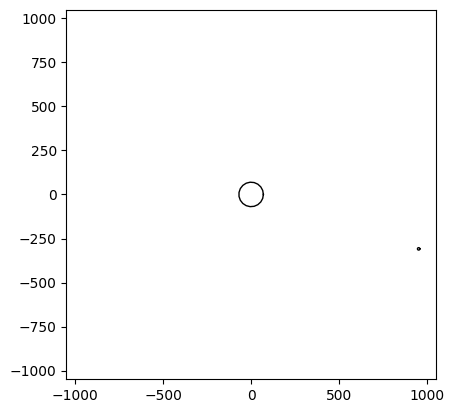

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.rcParams["animation.html"] = "html5"
plt.rcParams["figure.dpi"] = 100

datos = np.loadtxt("datos.dat")
Nframes = 400
n_datos = datos.shape[0]

fig, ax = plt.subplots()
mins = np.min(datos, axis=0)
maxs = np.max(datos, axis=0)
xmin, ymin = np.min(mins[::2]), np.min(mins[1::2])
xmax, ymax = np.max(maxs[::2]), np.max(maxs[1::2])
ax.set_xlim([xmin - 0.05 * np.abs(xmin), xmax + 0.05 * np.abs(xmax)])
ax.set_ylim([ymin - 0.05 * np.abs(ymin), ymax + 0.05 * np.abs(ymax)])
ax.set_aspect("equal")
N = datos.shape[1] // 2
r = np.array([696, 69]) * (
    1000 / 10e3
)  # en miles de km, 778e3 pero supongamos que es 10e3 es la distancia entre jupyter y el sol
theta = np.linspace(0, 2 * np.pi, 20)


# lines = [ax.plot([], [],'--', lw = 1.0)[0] for i in range(N)]
Planeta = [ax.plot([], [], "k-", lw=1.0)[0] for i in range(N)]


def init():
    return []


def animate(t):
    for i in range(N):
        # Grafica cada planeta como un circulo centrado en su posición
        x0 = datos[t * n_datos // Nframes, 2 * i]
        y0 = datos[t * n_datos // Nframes, 2 * i + 1]
        Planeta[i].set_data(x0 + r[i] * np.cos(theta), y0 + r[i] * np.sin(theta))
        # Grafica las trayectorias que siguen
        # lines[i].set_data(datos[:,2*i],datos[:,2*i+1])
    return tuple(Planeta)


anim = FuncAnimation(
    fig, animate, init_func=init, frames=Nframes, interval=100, blit=True
)
anim

## **b.**
Ahora, en vez de imprimir las coordenadas $x$,$y$ de Júpiter, imprima las coordenadas $x_{rot}, y_{rot}$ en un sistema que rota con Júpiter, de tal manera que tanto El Sol
como Júpiter se ven quietos.



La transformación es
\begin{align}
    \begin{pmatrix} x'\\ y'\end{pmatrix}
    = \begin{pmatrix} \cos(\theta) & \sin(\theta)\\ -\sin(\theta) & \cos(\theta) \end{pmatrix} \begin{pmatrix} x\\ y\end{pmatrix}
\end{align}

donde $\theta$ es el angulo que forma jupyter con el sol.

Primero tenemos que ir al marco del sol, quitar la rotación, y volver al marco incercial.

In [22]:
%%writefile NPlanetasPERFL.cpp

#include <iostream>
#include <cmath>
#include "vector.h"

using namespace std;

// Constantes problema físico
const double G = 1;
const int N = 2;
const int indice_sol = 0, indice_jupyter = 1;

// Constantes del algoritmo

const double xi=0.1786178958448091;
const double lambda=-0.2123418310626054;
const double chi=-0.06626458266981849;
const double Um2lambdaU2 = (1 - 2 * lambda) / 2;
const double Um2chiplusxi = 1 - 2 * (chi + xi);

// Declaración de la clase

class Cuerpo;
class Colisionador;

// Declaración de las interfases de las clases

class Cuerpo{
    private:
        vector3D r, V, F;
        double m, R;
    public:
        void Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0,
                    double m0);
        void BorreFuerza(void){F.load(0.0, 0.0, 0.0);};
        void SumeFuerza(vector3D dF){F += dF;};
        void Mueva_r(double dt, double coeff){r+=V*(coeff * dt);};
        void Mueva_V(double dt, double coeff){V+=F*(coeff * dt / m);};
        void Dibujese(void);
        double Getx(void){return r.x();};
        double Gety(void){return r.y();};
        friend class Colisionador;
};

class Colisionador{
    private:
    public:
        void CalculeFuerzasEntre(Cuerpo &Planeta1, Cuerpo &Planeta2);
        void CalculeTodasLasFuerzas(Cuerpo * Planetas);
};

// --------- Funciones de la clase cuerpo ------------

void Cuerpo::Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0,
                    double m0){
    r.load(x0, y0, z0); V.load(Vx0, Vy0, Vz0); m = m0;
}


// --------- Funciones de la clase Colisionador --------
void Colisionador::CalculeFuerzasEntre(Cuerpo &Planeta1, Cuerpo &Planeta2){
    double m1 = Planeta1.m, m2 = Planeta2.m;
    vector3D r21 = Planeta2.r - Planeta1.r; double r2 = r21.norm2();
    double aux = G * m2 * m1 * pow(r2, -1.5);
    vector3D F1 = r21 * aux;
    Planeta1.SumeFuerza(F1); Planeta2.SumeFuerza(-1*F1);
}

void Colisionador::CalculeTodasLasFuerzas(Cuerpo * Planeta){
    int i, j;
    // Borro las fuerzas de todos los Planetas
    for(i=0; i<N; i++){
        Planeta[i].BorreFuerza();
    }
    // Recorro por parejas, calculo la fuerza de cada pareja y se la sumo a los dos
    for(i=0; i<N; i++)
        for(j=0; j<i; j++)
            CalculeFuerzasEntre(Planeta[i],Planeta[j]);
}

// -------------- Funciones Globales --------------

void ImprimaPlanetasRotante(Cuerpo * Planeta){
    /* Pasamos al marco que rota con dos transformaciones, primero al marco del sol,
     y luego quitamos la rotación, y nos devolvemos al marco original.
    */

    // Creamos un vector de posiciones para cada planeta que imprimiremos al final
    vector3D Posiciones[N];
    for(int i=0; i<N; i++){
        Posiciones[i].load(Planeta[i].Getx(), Planeta[i].Gety(), 0.0);
    }

    // Pasamos al marco del sol
    for(int i=0; i<N; i++)
        Posiciones[i] -= Posiciones[indice_sol];

    // Calculamos el angulo
    double theta = atan2(Posiciones[indice_jupyter].y(), Posiciones[indice_jupyter].x());

    // Rotamos
    for(int i=0; i<N; i++)
        Posiciones[i].load(
            cos(theta)*Posiciones[i].x() + sin(theta)*Posiciones[i].y(),
            -1*sin(theta)*Posiciones[i].x() + cos(theta)*Posiciones[i].y(),
            0.0
            );
    // Volvemos al marco inercial
    for(int i=0; i<N; i++)
        Posiciones[i].load(
            Posiciones[i].x() + Planeta[indice_sol].Getx(),
            Posiciones[i].y() + Planeta[indice_sol].Gety(),
            0.0
        );

    // Imprimimos
    for(int i=0; i<N; i++)
        cout << Posiciones[i].x() << " " << Posiciones[i].y() << " ";
    cout << Posiciones[N-1].x() << " " << Posiciones[N-1].y() << endl;
}


int main(){
    double r = 1000, m0 = 1047, m1 = 1.0;
    double M = m0 + m1, mu = m0 * m1 / M;
    double x0 = -m1 * r / M, x1 = m0 * r /M;
    double omega = sqrt(G * M / pow(r,3));
    double T = 2 * M_PI / omega;
    double t, dt = T / 1000, ttotal = 20*T;
    double V0 = omega * x0, V1 = omega * x1;
    int i = 0;
    Cuerpo Planeta[N];
    Colisionador Newton;

    // (double x0, double y0, double z0, double Vx0, double Vy0, double Vz0, double m0)
    Planeta[0].Inicie(x0, 0, 0, 0, V0, 0, m0);
    Planeta[1].Inicie(x1, 0, 0, 0, V1, 0, m1);


    for(t = 0; t < ttotal; t+=dt){
        ImprimaPlanetasRotante(Planeta);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, xi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, Um2lambdaU2);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, chi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, lambda);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, Um2chiplusxi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, lambda);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, chi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, Um2lambdaU2);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, xi);
    }
    return 0;
}

Overwriting NPlanetasPERFL.cpp


In [23]:
%%bash

g++ NPlanetasPERFL.cpp
./a.out > datos.dat

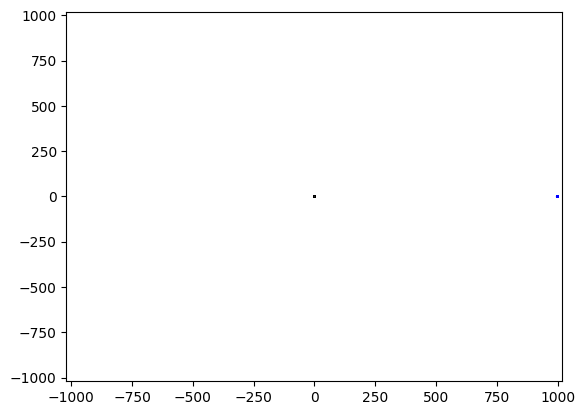

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Gráfico de las trayectorias

datos = np.loadtxt("datos.dat")

fig, ax = plt.subplots()

ax.set_xlim([-1020, 1020])
ax.set_ylim([-1020, 1020])

ax.plot(datos[:, 0], datos[:, 1], "k--")
ax.plot(datos[:, 2], datos[:, 3], "b-")

## **c.**
Si desde este sistema rotante se estudia el movimiento de un tercer cuerpo cualquiera, se observa sobre él el efecto de cuatro fuerzas: la atracción de El Sol, la atracción de Júpiter, la fuerza centrífuga y la fuerza de Coriolis, pero ésta última no afecta a cuerpos que se vean en reposo desde el sistema rotante. Lagrange (en 1772) calculó los puntos en los que las tres fuerzas restantes se equilibran, que se conocen como puntos de libración. De ellos, sólo dos son puntos estables (L4 y L5), y se encuentran sobre la órbita circular de Júpiter, 60$^°$ en adelanto y 60$^°$ en atraso (ver Figura). Un tercer planeta colocado en reposo en estos puntos (es decir, rotando con la misma órbita de Júpiter pero 60$^°$ en adelanto o en atraso), permanecería en reposo. De hecho, existe una infinidad de planetas, llamados troyanos, que orbitan alrededor del sol cerca de estos dos puntos.

Coloque un tercer planeta de masa $m_3 = 0.005$ en el punto de libración L4 girando con la misma rapidez que Júpiter, y compruebe que permanece aproximadamente quieto por 20 órbitas.

Vamos a suponer que la trayectoria circular esta centrada en el origen (y no en el centro de masa).

In [25]:
%%writefile NPlanetasPERFL.cpp

#include <iostream>
#include <cmath>
#include "vector.h"

using namespace std;

// Constantes problema físico
const double G = 1;
const int N = 3;
const int indice_sol = 0, indice_jupyter = 1;

// Constantes del algoritmo

const double xi=0.1786178958448091;
const double lambda=-0.2123418310626054;
const double chi=-0.06626458266981849;
const double Um2lambdaU2 = (1 - 2 * lambda) / 2;
const double Um2chiplusxi = 1 - 2 * (chi + xi);

// Declaración de la clase

class Cuerpo;
class Colisionador;

// Declaración de las interfases de las clases

class Cuerpo{
    private:
        vector3D r, V, F;
        double m, R;
    public:
        void Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0,
                    double m0);
        void BorreFuerza(void){F.load(0.0, 0.0, 0.0);};
        void SumeFuerza(vector3D dF){F += dF;};
        void Mueva_r(double dt, double coeff){r+=V*(coeff * dt);};
        void Mueva_V(double dt, double coeff){V+=F*(coeff * dt / m);};
        void Dibujese(void);
        double Getx(void){return r.x();};
        double Gety(void){return r.y();};
        friend class Colisionador;
};

class Colisionador{
    private:
    public:
        void CalculeFuerzasEntre(Cuerpo &Planeta1, Cuerpo &Planeta2);
        void CalculeTodasLasFuerzas(Cuerpo * Planetas);
};

// --------- Funciones de la clase cuerpo ------------

void Cuerpo::Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0,
                    double m0){
    r.load(x0, y0, z0); V.load(Vx0, Vy0, Vz0); m = m0;
}


// --------- Funciones de la clase Colisionador --------
void Colisionador::CalculeFuerzasEntre(Cuerpo &Planeta1, Cuerpo &Planeta2){
    double m1 = Planeta1.m, m2 = Planeta2.m;
    vector3D r21 = Planeta2.r - Planeta1.r; double r2 = r21.norm2();
    double aux = G * m2 * m1 * pow(r2, -1.5);
    vector3D F1 = r21 * aux;
    Planeta1.SumeFuerza(F1); Planeta2.SumeFuerza(-1*F1);
}

void Colisionador::CalculeTodasLasFuerzas(Cuerpo * Planeta){
    int i, j;
    // Borro las fuerzas de todos los Planetas
    for(i=0; i<N; i++){
        Planeta[i].BorreFuerza();
    }
    // Recorro por parejas, calculo la fuerza de cada pareja y se la sumo a los dos
    for(i=0; i<N; i++)
        for(j=0; j<i; j++)
            CalculeFuerzasEntre(Planeta[i],Planeta[j]);
}

// -------------- Funciones Globales --------------

void ImprimaPlanetas(Cuerpo * Planeta){
    for(int i=0; i<N-1; i++)
        cout << Planeta[i].Getx() << " " << Planeta[i].Gety() << " ";
    cout << Planeta[N-1].Getx() << " " << Planeta[N-1].Gety() << endl;
}

void ImprimaPlanetasRotante(Cuerpo * Planeta){
    /* Pasamos al marco que rota con dos transformaciones, primero al marco del sol,
     y luego quitamos la rotación, y nos devolvemos al marco original.
    */

    // Creamos un vector de posiciones para cada planeta que imprimiremos al final
    vector3D Posiciones[N];
    for(int i=0; i<N; i++){
        Posiciones[i].load(Planeta[i].Getx(), Planeta[i].Gety(), 0.0);
    }

    // Pasamos al marco del sol
    for(int i=0; i<N; i++)
        Posiciones[i] -= Posiciones[indice_sol];

    // Calculamos el angulo
    double theta = atan2(Posiciones[indice_jupyter].y(), Posiciones[indice_jupyter].x());

    // Rotamos
    for(int i=0; i<N; i++)
        Posiciones[i].load(
            cos(theta)*Posiciones[i].x() + sin(theta)*Posiciones[i].y(),
            -1*sin(theta)*Posiciones[i].x() + cos(theta)*Posiciones[i].y(),
            0.0
            );
    // Volvemos al marco inercial
    for(int i=0; i<N; i++)
        Posiciones[i].load(
            Posiciones[i].x() + Planeta[indice_sol].Getx(),
            Posiciones[i].y() + Planeta[indice_sol].Gety(),
            0.0
        );

    // Imprimimos
    for(int i=0; i<N; i++)
        cout << Posiciones[i].x() << " " << Posiciones[i].y() << " ";
    cout << Posiciones[N-1].x() << " " << Posiciones[N-1].y() << endl;
}


int main(){
    double r = 1000, m0 = 1047, m1 = 1.0, m2 = 0.005;
    double M = m0 + m1, mu = m0 * m1 / M;
    double x0 = -m1 * r / M, x1 = m0 * r /M;
    double omega = sqrt(G * M / pow(r,3));
    double T = 2 * M_PI / omega;
    double t, dt = T / 1000, ttotal = 20*T;
    double V0 = omega * x0, V1 = omega * x1, V2 = omega * r;
    int i = 0;
    Cuerpo Planeta[N];
    Colisionador Newton;

    // (double x0, double y0, double z0, double Vx0, double Vy0, double Vz0, double m0)
    Planeta[0].Inicie(x0, 0, 0, 0, V0, 0, m0);
    Planeta[1].Inicie(x1, 0, 0, 0, V1, 0, m1);
    Planeta[2].Inicie(r*cos(M_PI/3), r*sin(M_PI/3), 0, -V2*cos(M_PI/2 - M_PI/3), V2*sin(M_PI/2 - M_PI/3), 0, m2);

    for(t = 0; t < ttotal; t+=dt){
        ImprimaPlanetas(Planeta);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, xi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, Um2lambdaU2);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, chi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, lambda);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, Um2chiplusxi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, lambda);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, chi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, Um2lambdaU2);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, xi);
    }
    return 0;
}

Overwriting NPlanetasPERFL.cpp


In [26]:
%%bash

g++ NPlanetasPERFL.cpp
./a.out > datos.dat

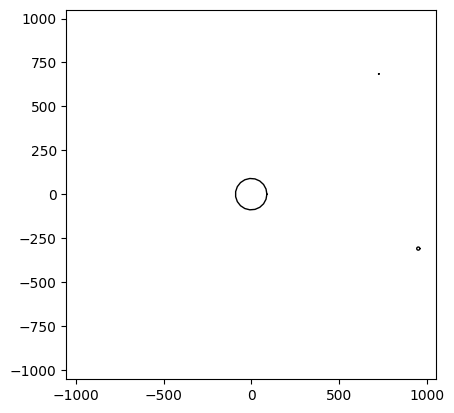

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.rcParams["animation.html"] = "html5"
plt.rcParams["figure.dpi"] = 100

datos = np.loadtxt("datos.dat")
Nframes = 400
n_datos = datos.shape[0]

fig, ax = plt.subplots()
mins = np.min(datos, axis=0)
maxs = np.max(datos, axis=0)
xmin, ymin = np.min(mins[::2]), np.min(mins[1::2])
xmax, ymax = np.max(maxs[::2]), np.max(maxs[1::2])
ax.set_xlim([xmin - 0.05 * np.abs(xmin), xmax + 0.05 * np.abs(xmax)])
ax.set_ylim([ymin - 0.05 * np.abs(ymin), ymax + 0.05 * np.abs(ymax)])
ax.set_aspect("equal")
N = datos.shape[1] // 2
r = np.array([696, 69, 10]) * (
    1000 / 7.78e3
)  # en miles de km, 778e3 pero supongamos que la escala a usar es 7.78e3 (para que se vea)
theta = np.linspace(0, 2 * np.pi, 20)


# lines = [ax.plot([], [],'--', lw = 1.0)[0] for i in range(N)]
Planeta = [ax.plot([], [], "k-", lw=1.0)[0] for i in range(N)]


def init():
    return []


def animate(t):
    for i in range(N):
        # Grafica cada planeta como un circulo centrado en su posición
        x0 = datos[t * n_datos // Nframes, 2 * i]
        y0 = datos[t * n_datos // Nframes, 2 * i + 1]
        Planeta[i].set_data(x0 + r[i] * np.cos(theta), y0 + r[i] * np.sin(theta))
        # Grafica las trayectorias que siguen
        # lines[i].set_data(datos[:,2*i],datos[:,2*i+1])
    return tuple(Planeta)


anim = FuncAnimation(
    fig, animate, init_func=init, frames=Nframes, interval=100, blit=True
)
anim

## **d.**

Perturbe un poco la posición o la velocidad inicial del planeta troyano (en unas cuantas partes por mil) y observe que el planeta dibuja en el sistema rotante una trayectoria en espiral, como la que muestra la figura. Esta espiral corresponde, aproximadamente, a una elipse moviéndose sobre otra elipse, como en los epiciclos de Ptolomeo. Los periodos de estos dos movimientos elípticos superpuestos se pueden calcular por teoría clásica de perturbaciones, y resultan ser:
$$
T_1 = \frac{T}{\sqrt{\frac{27\,m_1}{4\,\,m_0}}},\quad T_2 = \frac{T}{1-\frac{27\,m_1}{8\,\,m_0}}
$$
donde $T = 2\pi/\omega$ es el período de rotación del
sistema Sol-Júpiter.

In [28]:
%%writefile NPlanetasPERFL.cpp

#include <iostream>
#include <cmath>
#include "vector.h"

using namespace std;

// Constantes problema físico
const double G = 1;
const int N = 3;
const int indice_sol = 0, indice_jupyter = 1;

// Constantes del algoritmo

const double xi=0.1786178958448091;
const double lambda=-0.2123418310626054;
const double chi=-0.06626458266981849;
const double Um2lambdaU2 = (1 - 2 * lambda) / 2;
const double Um2chiplusxi = 1 - 2 * (chi + xi);

// Declaración de la clase

class Cuerpo;
class Colisionador;

// Declaración de las interfases de las clases

class Cuerpo{
    private:
        vector3D r, V, F;
        double m, R;
    public:
        void Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0,
                    double m0);
        void BorreFuerza(void){F.load(0.0, 0.0, 0.0);};
        void SumeFuerza(vector3D dF){F += dF;};
        void Mueva_r(double dt, double coeff){r+=V*(coeff * dt);};
        void Mueva_V(double dt, double coeff){V+=F*(coeff * dt / m);};
        void Dibujese(void);
        double Getx(void){return r.x();};
        double Gety(void){return r.y();};
        friend class Colisionador;
};

class Colisionador{
    private:
    public:
        void CalculeFuerzasEntre(Cuerpo &Planeta1, Cuerpo &Planeta2);
        void CalculeTodasLasFuerzas(Cuerpo * Planetas);
};

// --------- Funciones de la clase cuerpo ------------

void Cuerpo::Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0,
                    double m0){
    r.load(x0, y0, z0); V.load(Vx0, Vy0, Vz0); m = m0;
}


// --------- Funciones de la clase Colisionador --------
void Colisionador::CalculeFuerzasEntre(Cuerpo &Planeta1, Cuerpo &Planeta2){
    double m1 = Planeta1.m, m2 = Planeta2.m;
    vector3D r21 = Planeta2.r - Planeta1.r; double r2 = r21.norm2();
    double aux = G * m2 * m1 * pow(r2, -1.5);
    vector3D F1 = r21 * aux;
    Planeta1.SumeFuerza(F1); Planeta2.SumeFuerza(-1*F1);
}

void Colisionador::CalculeTodasLasFuerzas(Cuerpo * Planeta){
    int i, j;
    // Borro las fuerzas de todos los Planetas
    for(i=0; i<N; i++){
        Planeta[i].BorreFuerza();
    }
    // Recorro por parejas, calculo la fuerza de cada pareja y se la sumo a los dos
    for(i=0; i<N; i++)
        for(j=0; j<i; j++)
            CalculeFuerzasEntre(Planeta[i],Planeta[j]);
}

// -------------- Funciones Globales --------------

void ImprimaPlanetas(Cuerpo * Planeta){
    for(int i=0; i<N-1; i++)
        cout << Planeta[i].Getx() << " " << Planeta[i].Gety() << " ";
    cout << Planeta[N-1].Getx() << " " << Planeta[N-1].Gety() << endl;
}

void ImprimaPlanetasRotante(Cuerpo * Planeta){
    /* Pasamos al marco que rota con dos transformaciones, primero al marco del sol,
     y luego quitamos la rotación, y nos devolvemos al marco original.
    */

    // Creamos un vector de posiciones para cada planeta que imprimiremos al final
    vector3D Posiciones[N];
    for(int i=0; i<N; i++){
        Posiciones[i].load(Planeta[i].Getx(), Planeta[i].Gety(), 0.0);
    }

    // Pasamos al marco del sol
    for(int i=0; i<N; i++)
        Posiciones[i] -= Posiciones[indice_sol];

    // Calculamos el angulo
    double theta = atan2(Posiciones[indice_jupyter].y(), Posiciones[indice_jupyter].x());

    // Rotamos
    for(int i=0; i<N; i++)
        Posiciones[i].load(
            cos(theta)*Posiciones[i].x() + sin(theta)*Posiciones[i].y(),
            -1*sin(theta)*Posiciones[i].x() + cos(theta)*Posiciones[i].y(),
            0.0
            );
    // Volvemos al marco inercial
    for(int i=0; i<N; i++)
        Posiciones[i].load(
            Posiciones[i].x() + Planeta[indice_sol].Getx(),
            Posiciones[i].y() + Planeta[indice_sol].Gety(),
            0.0
        );

    // Imprimimos
    for(int i=0; i<N; i++)
        cout << Posiciones[i].x() << " " << Posiciones[i].y() << " ";
    cout << Posiciones[N-1].x() << " " << Posiciones[N-1].y() << endl;
}


int main(){
    double r = 1000, m0 = 1047, m1 = 1.0, m2 = 0.005;
    double M = m0 + m1, mu = m0 * m1 / M;
    double x0 = -m1 * r / M, x1 = m0 * r /M;
    double omega = sqrt(G * M / pow(r,3));
    double T = 2 * M_PI / omega;
    double t, dt = T / 1000, ttotal = 25*T;
    double V0 = omega * x0, V1 = omega * x1, V2 = omega * r, factor = 0.998;
    int i = 0;
    Cuerpo Planeta[N];
    Colisionador Newton;

    // (double x0, double y0, double z0, double Vx0, double Vy0, double Vz0, double m0)
    Planeta[0].Inicie(x0, 0, 0, 0, V0, 0, m0);
    Planeta[1].Inicie(x1, 0, 0, 0, V1, 0, m1);
    Planeta[2].Inicie(
        r*cos(M_PI/3), r*sin(M_PI/3), 0, // Posiciones
        -1*factor*V2*cos(M_PI/2 - M_PI/3), factor*V2*sin(M_PI/2 - M_PI/3), 0, // Velocidades
         m2 // Masa
         );

    for(t = 0; t < ttotal; t+=dt){
        cout << t << " ";
        ImprimaPlanetasRotante(Planeta);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, xi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, Um2lambdaU2);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, chi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, lambda);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, Um2chiplusxi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, lambda);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, chi);
        Newton.CalculeTodasLasFuerzas(Planeta); for(i=0; i<N; i++) Planeta[i].Mueva_V(dt, Um2lambdaU2);
        for(i=0; i<N; i++) Planeta[i].Mueva_r(dt, xi);
    }
    return 0;
}

Overwriting NPlanetasPERFL.cpp


In [29]:
%%bash

g++ NPlanetasPERFL.cpp
./a.out > datos.dat

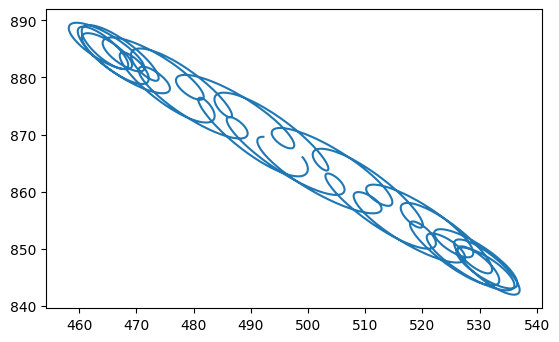

In [30]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.loadtxt("datos.dat")
n_datos = datos.shape[0]

fig, ax = plt.subplots()
# mins = np.min(datos, axis=0)
# maxs = np.max(datos, axis=0)
# xmin, ymin = np.min(mins[::2]), np.min(mins[1::2])
# xmax, ymax = np.max(maxs[::2]), np.max(maxs[1::2])
# ax.set_xlim([xmin - 0.05*np.abs(xmin), xmax + 0.05*np.abs(xmax)])
# ax.set_ylim([ymin - 0.05*np.abs(ymin), ymax + 0.05*np.abs(ymax)])
ax.set_aspect("equal")
N = datos.shape[1] // 2

# ax.plot(datos[:,0],datos[:,1])
# ax.plot(datos[:,2],datos[:,3])
ax.plot(datos[:, 5], datos[:, 6])

## **e.**
Grafique la posición x del planeta troyano en el sistema rotante en función del tiempo y mida aproximadamente los dos
periodos. Compare los valores obtenidos con los predichos por la teoría clásica de perturbaciones.

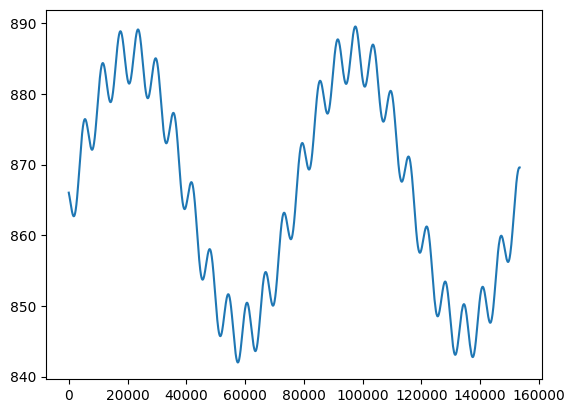

In [31]:
plt.plot(datos[:, 0], datos[:, 6])

array([76723.193805 , 38361.5969025,  6137.8555044])

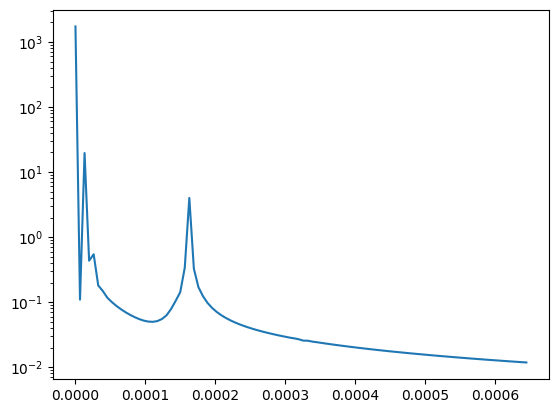

In [32]:
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

dt = datos[1, 0] - datos[0, 0]

yf = 2 / n_datos * np.abs(fft(datos[:, 6]))[: n_datos // 2]
xf = fftfreq(n_datos, dt)[: n_datos // 2]

lim = 100
plt.semilogy(xf[:lim], yf[:lim])
peaks = find_peaks(yf[:lim])[0]

1 / xf[peaks]

In [33]:
T1 = datos[-1, 0] / 2
T2 = datos[-1, 0] / 25

print(T1, T2)

76720.0 6137.6


In [34]:
T1_teo = (datos[-1, 0] / 25) * ((27 / 4) * (1 / 1027)) ** (-0.5)
T2_teo = (datos[-1, 0] / 25) * (1 - (27 / 8) * (1 / 1027)) ** (-1)

print(T1_teo, T2_teo)

75706.28172138054 6157.836317010624


## **f**

Sabiendo que en las unidades de trabajo de este problema la masa de Júpiter ($1.898\times 10^{27}\,\text{kg}$) es 1, la distancia media de Júpiter al Sol (778,412,026 km) es 1000, y la constante gravitacional $G$ ($6.67408(31)\times 10^{−11} \text{m}^3\text{kg}^{−1}\text{s}^{−2}$) es 1, halle a cuántos segundos corresponde una unidad de tiempo, y dé los periodos del punto d) en años.

In [35]:
r = 778412026e3
m1 = 1.898e27
m0 = 1047 * m1
m2 = 0.005 * m1
G = 6.67408e-11
M = m0 + m1
mu = m0 * m1 / M
x0 = -m1 * r / M
x1 = m0 * r / M
omega = np.sqrt(G * M / r**3)
T = 2 * np.pi / omega
dt = T / 1000  # Unidad de tiempo usada en la simulacion en SI i.e segundos
dt = dt / (365 * 24 * 3600)  # Conversión a años

print(T1 * dt, T2 * dt)

911.1118843530708 72.88895074824566


# 4. Gas de Lennard-Jones

El potencial de Lennard-Jones
$$
    V(r) = \epsilon\left[\left(\frac{r_0}{r}\right)^{12}-2\left(\frac{r_0}{r}\right)^{6}\right]
$$
es un modelo aproximado de la interacción entre moléculas no polares que combina una fuerza repulsiva de exclusión de Pauli (el término a la potencia 12) con una fuerza atractiva debida a fuerzas de van der Waals (el término a la potencia 6). El potencial presenta un valor mínimo $-\epsilon$ a una distancia $r_0$, que es la distancia de equilibrio. La fuerza derivada de este potencial,
$$
    F(r) = \frac{12\epsilon}{r}\left[\left(\frac{r_0}{r}\right)^{12}-\left(\frac{r_0}{r}\right)^{6}\right]
$$
es una fuerza restitutiva alrededor de $r_0$, que corresponde más o menos a la de un resorte que es difícil de comprimir, pero fácil de estirar.

## 1)
Construya un programa que simule el movimiento de una partícula bidimensional de masa m bajo el influjo de una fuerza de Lennard-Jones, implementada como una fuerza central. Utilice $m = 1.0$, $R = 3.0$, $\epsilon = 1.0$ y $r_0 = 10$. Como condición inicial coloque la partícula en $x = 10$, $y = 0$, $ V_x(0) = V_0$ y $ V_y= 0$, con $V_0 = \sqrt{K_B T / m}$ , donde $k_B T = 1.0$ es la temperatura.

a. Observe cómo oscila.

b. Grafique x vs t para $0 < t < 100$, y cuadre el paso $\Delta t$ para que la energía no crezca (esto se puede comprobar verificando que la curva no cambia si se hace $\Delta t$ diez veces más pequeño).

In [36]:
%%writefile Gas2D.cpp

#include <iostream>
#include <cmath>
#include "vector.h"
#include <random>

using namespace std;

// Constantes problema físico
const double eps = 1.0, r0 = 10.0;
const double KHertz = 1.0e4;

// Constantes del algoritmo

const double xi=0.1786178958448091;
const double lambda=-0.2123418310626054;
const double chi=-0.06626458266981849;
const double Um2lambdaU2 = (1 - 2 * lambda) / 2;
const double Um2chiplusxi = 1 - 2 * (chi + xi);

// Declaración de la clase

class Cuerpo;

// Declaración de las interfases de las clases

class Cuerpo{
    private:
        vector3D r, V, F;
        double m, R;
    public:
        void Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0,
                    double m0, double R0);
        void CalculeFuerza(void);
        double CalculeEnergia(void);
        void Mueva_r(double dt, double coeff){r+=V*(coeff * dt);};
        void Mueva_V(double dt, double coeff){V+=F*(coeff * dt / m);};
        void Dibujese(void);
        double Getx(void){return r.x();};
        double Gety(void){return r.y();};
};


// --------- Funciones de la clase cuerpo ------------

void Cuerpo::Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0,
                    double m0, double R0){
    r.load(x0, y0, z0); V.load(Vx0, Vy0, Vz0); m = m0; R = R0;
}

void Cuerpo::CalculeFuerza(void){
    double rnorm = r.norm();
    double r0_rnorm = r0 * pow(rnorm, -1);
    double aux = 12 * eps * pow(rnorm, -2) * (pow(r0_rnorm, 12) - pow(r0_rnorm, 6));
    F = aux * r;
}

double Cuerpo::CalculeEnergia(void){
    // Energia potencial
    double rnorm = r.norm();
    double r0_rnorm = r0 * pow(rnorm, -1);
    double Potencial = eps * (pow(r0_rnorm, 12) - 2*pow(r0_rnorm, 6));
    // Energia cinética
    double Cinetica = 0.5 * m * V.norm2();
    return Potencial + Cinetica;
}

int main(){

    Cuerpo Molecula;
    random_device rd;
    mt19937_64 gen(rd()); uniform_real_distribution<> dis(0.0, 1.0);
    // Crandom ran64(1);

    // Parametros de la simulación

    double m0 = 1.0; double R0 = 3.0;
    double kT = 1.0, V0 = sqrt(kT / m0);
    double x0 = 10, y0 = 0, Vx0 = V0, Vy0 = 0;
    double t, dt = 1e-2, ttotal = 100;

    // INICIO

    Molecula.Inicie(x0, y0, 0, Vx0, Vy0, 0, m0, R0);

    for(t = 0; t < ttotal; t+=dt){

        cout << t << " " << Molecula.Getx() << " " << Molecula.Gety() << " " << Molecula.CalculeEnergia() << endl;

        Molecula.Mueva_r(dt, xi);
        Molecula.CalculeFuerza(); Molecula.Mueva_V(dt, Um2lambdaU2);
        Molecula.Mueva_r(dt, chi);
        Molecula.CalculeFuerza(); Molecula.Mueva_V(dt, lambda);
        Molecula.Mueva_r(dt, Um2chiplusxi);
        Molecula.CalculeFuerza(); Molecula.Mueva_V(dt, lambda);
        Molecula.Mueva_r(dt, chi);
        Molecula.CalculeFuerza(); Molecula.Mueva_V(dt, Um2lambdaU2);
        Molecula.Mueva_r(dt, xi);
    }
    return 0;
}

Overwriting Gas2D.cpp


In [37]:
%%bash

g++ Gas2D.cpp
./a.out > datos.dat

Text(0.5, 0, 'Tiempo')

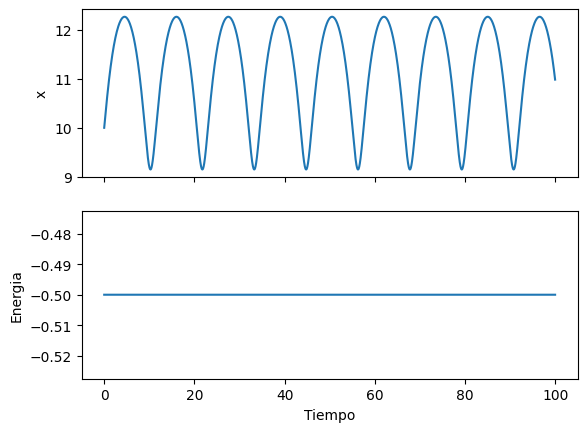

In [38]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.loadtxt("datos.dat")

fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(datos[:, 0], datos[:, 1])
ax[0].set_ylabel("x")
ax[1].plot(datos[:, 0], datos[:, -1])
ax[1].set_ylabel("Energia")
ax[1].set_xlabel("Tiempo")

## 2)

Ahora el objetivo es construir un gas de partículas que interactúan por Lennard-Jones. Para eso, modifique el programa Gas2D visto en clase de la siguiente manera:

a. Modifique la fuerza entre moléculas para que sea la de Lennard-Jones, con los mismos parámetros del punto anterior.

b. Como condición inicial, coloque un cuadrado de 5x5 partículas en las posiciones $x=-20,-10,0,10,20$ y $y=-20,-10,0,10,20$, con magnitud de velocidad inicial $V_0 = \sqrt{k_BT/m}$, como en el caso anterior, y dirección de la velocidad $\theta$ escogida al azar entre 0 y $2\pi$.

c. Quite los granos que hacen las veces de paredes. En su lugar, dibuje un círculo de radio $R_{pared}=50$ centrado en el origen y añada una fuerza global de rebote ejercida por esa pared circular de la siguiente manera: si el grano de radio $R$ penetra en la pared una distancia $s$, sentirá una fuerza de mangnitud $F = Ks$ en dirección hacia el origen, con $K=10000$.

d. Fije el paso de tiempo a $\Delta t=5\times 10^{-4}$, el tiempo máximo de simulación en $t_{max} = 100$ y dibuje en la animación un total de 2000 cuadros.

e. Vea qué pasa si $k_BT = 0.05$ (un sólido), $k_BT = 0.5$ (un líquido), y $k_BT = 10.0$ (un gas).

In [39]:
%%writefile Gas2D.cpp

#include <iostream>
#include <cmath>
#include "vector.h"
#include <random>

using namespace std;

// Constantes problema físico
const int Nx = 5, Ny = 5;
const int N = Nx * Ny;
const double KHertz = 1.0e4;
const double Rpared = 50;
const double r0 = 10, eps = 1.0;

// Constantes del algoritmo

const double xi=0.1786178958448091;
const double lambda=-0.2123418310626054;
const double chi=-0.06626458266981849;
const double Um2lambdaU2 = (1 - 2 * lambda) / 2;
const double Um2chiplusxi = 1 - 2 * (chi + xi);

// Declaración de la clase

class Cuerpo;
class Colisionador;

// Declaración de las interfases de las clases

class Cuerpo{
    private:
        vector3D r, V, F;
        double m, R;
    public:
        void Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0,
                    double m0, double R0);
        void BorreFuerza(void){F.load(0.0, 0.0, 0.0);};
        void SumeFuerza(vector3D dF){F += dF;};
        void Mueva_r(double dt, double coeff){r+=V*(coeff * dt);};
        void Mueva_V(double dt, double coeff){V+=F*(coeff * dt / m);};
        void Dibujese(void);
        double Getx(void){return r.x();};
        double Gety(void){return r.y();};
        friend class Colisionador;
};

class Colisionador{
    private:
    public:
        void CalculeFuerzasEntre(Cuerpo &Molecula1, Cuerpo &Molecula2);
        void CalculeFuerzaPared(Cuerpo &Molecula);
        void CalculeTodasLasFuerzas(Cuerpo * Molecula);
        double CalculeEnergiaTotal(Cuerpo * Molecula);
};

// --------- Funciones de la clase cuerpo ------------

void Cuerpo::Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0,
                    double m0, double R0){
    r.load(x0, y0, z0); V.load(Vx0, Vy0, Vz0); m = m0; R = R0;
}


// --------- Funciones de la clase Colisionador --------
void Colisionador::CalculeFuerzasEntre(Cuerpo &Molecula1, Cuerpo &Molecula2){
    // Calcular el vector normal
    vector3D r21 = Molecula2.r - Molecula1.r;
    double r = r21.norm(); double r0_r = r0 / r;
    double aux = 12 * eps * pow(r, -2) * (pow(r0_r, 12) - pow(r0_r, 6));
    vector3D F1 = aux * r21;
    Molecula2.SumeFuerza(F1); Molecula1.SumeFuerza(-1*F1);
}

void Colisionador::CalculeFuerzaPared(Cuerpo &Molecula){
    double s, r;
    r = Molecula.r.norm(); s = Molecula.R - (Rpared - r);
    if(s>0){
        vector3D F = -1.0 * KHertz * s * Molecula.r * pow(r, -1);
        Molecula.SumeFuerza(F);
    }
}

void Colisionador::CalculeTodasLasFuerzas(Cuerpo * Molecula){
    int i, j;

    // Borro las fuerzas de todos los Moleculas
    for(i=0; i<N; i++){
        Molecula[i].BorreFuerza();
    }

    // Recorro por parejas, calculo la fuerza de cada pareja y se la sumo a los dos
    for(i=0; i<N; i++){
        CalculeFuerzaPared(Molecula[i]);
        for(j=i+1; j<N; j++)
            CalculeFuerzasEntre(Molecula[i],Molecula[j]);
    }
}

double Colisionador::CalculeEnergiaTotal(Cuerpo * Molecula){
    double Potencial, Cinetica, PotencialTotal = 0.0, CineticaTotal = 0.0;
    double rnorm, r0_rnorm;

    for(int i=0; i<N; i++){
        // Energia potencial
        rnorm = Molecula[i].r.norm();
        r0_rnorm = r0 * pow(rnorm, -1);
        Potencial = eps * (pow(r0_rnorm, 12) - 2*pow(r0_rnorm, 6));

        // Energia cinética
        Cinetica = 0.5 * Molecula[i].m * Molecula[i].V.norm2();

        // Sume a los acumuladores
        PotencialTotal += Potencial; CineticaTotal += Cinetica;
    }
    return PotencialTotal + CineticaTotal;
}

int main(){

    Cuerpo Molecula[N];
    Colisionador Newton;
    random_device rd;
    mt19937_64 gen(rd()); uniform_real_distribution<> dis(0.0, 1.0);
    // Crandom ran64(1);
    int i,j;

    // Parametros de la simulación
    double m0 = 1.0; double R0 = 3.0;
    double kT = 10.0, V0 = sqrt(kT / m0);
    double x0, y0, Vx0, Vy0, theta;
    double t, dt = 5e-4, ttotal = 100;
    double dx = 10, dy = 10;

    // INICIO

    for(i=0; i<Nx; i++)
        for(j=0; j<Ny; j++){
            // theta = ran64.r() * 2 * M_PI;
            theta = dis(gen) * 2 * M_PI;
            x0 = i*dx - 20; y0 = j*dy - 20; Vx0 = V0*cos(theta); Vy0 = V0*sin(theta);
            Molecula[i + Ny * j].Inicie(x0, y0, 0, Vx0, Vy0, 0, m0, R0);
        }

    for(t = 0; t < ttotal; t+=dt){

        for(int n=0; n<N-1; n++){
            cout << Molecula[n].Getx() << " " << Molecula[n].Gety() << " ";
        }
        cout << Molecula[N-1].Getx() << " " << Molecula[N-1].Gety() << endl;

        for(i=0; i<N; i++) Molecula[i].Mueva_r(dt, xi);
        Newton.CalculeTodasLasFuerzas(Molecula); for(i=0; i<N; i++) Molecula[i].Mueva_V(dt, Um2lambdaU2);
        for(i=0; i<N; i++) Molecula[i].Mueva_r(dt, chi);
        Newton.CalculeTodasLasFuerzas(Molecula); for(i=0; i<N; i++) Molecula[i].Mueva_V(dt, lambda);
        for(i=0; i<N; i++) Molecula[i].Mueva_r(dt, Um2chiplusxi);
        Newton.CalculeTodasLasFuerzas(Molecula); for(i=0; i<N; i++) Molecula[i].Mueva_V(dt, lambda);
        for(i=0; i<N; i++) Molecula[i].Mueva_r(dt, chi);
        Newton.CalculeTodasLasFuerzas(Molecula); for(i=0; i<N; i++) Molecula[i].Mueva_V(dt, Um2lambdaU2);
        for(i=0; i<N; i++) Molecula[i].Mueva_r(dt, xi);
    }
    return 0;
}

Overwriting Gas2D.cpp


In [40]:
%%bash

g++ Gas2D.cpp -O1
./a.out > datos.dat

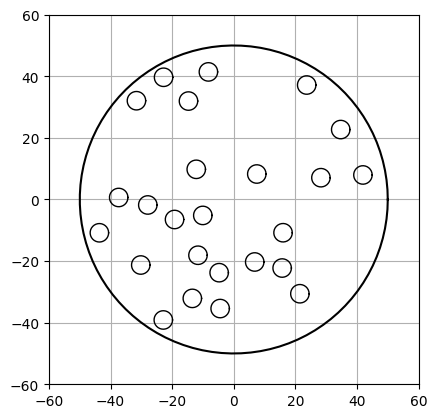

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation

plt.rcParams["animation.html"] = "html5"
plt.rcParams["figure.dpi"] = 100

datos = np.loadtxt("datos.dat")

Nframes = 200
n_datos = datos.shape[0]

N = datos.shape[1] // 2
r = 3.0
Rpared = 50

fig, ax = plt.subplots()
ax.set_xlim([-Rpared - 10, Rpared + 10])
ax.set_ylim([-Rpared - 10, Rpared + 10])
ax.set_aspect("equal")
ax.grid()

theta = np.linspace(0, 2 * np.pi, 100)
ax.plot(Rpared * np.cos(theta), Rpared * np.sin(theta), "k-")

theta = np.linspace(0, 2 * np.pi, 30)
Molecula = [ax.plot([], [], "k", lw=1)[0] for i in range(N)]


def init():
    return []


def animate(t):
    for i in range(N):
        x0 = datos[t * n_datos // Nframes, 2 * i]
        y0 = datos[t * n_datos // Nframes, 2 * i + 1]
        Molecula[i].set_data(x0 + r * np.cos(theta), y0 + r * np.sin(theta))
    return tuple(Molecula)


anim = FuncAnimation(
    fig, animate, init_func=init, frames=Nframes, interval=10, blit=True
)
anim

## 3)

Ahora vamos a construir una función que mida de manera aproximada el tamaño ocupado por los $N = 25$ granos. Para ello, utilizaremos el radio de giro, que (como todas las masas son iguales) es dado por

$$
    R_{giro} = \sqrt{\frac{1}{N}\sum_{i=0}^{N-1}|\vec{r}_i -\vec{r}_{cm}|^2}
$$

a. Como primera parte de la función, calcule el vector posición $\vec{r}_{cm}$ del centro
de masa de todos los granos, como
$$
    \vec{r}_{cm} = \frac{1}{N}\sum_{i=0}^{N-1}\vec{r}_i
$$

b. Complete la función para que calcule y devuelva el valor $R_{giro}$.

c. En el programa principal, deje de hacer la animación y en vez de ello imprima $R_{giro}$ en función de $t$. Grafique en una sola figura $R_{giro}$ en función de $t$ para los casos de sólido, líquido y gas ($0 \leq t \leq 100$).

d. Calcule el valor promedio de $R_{giro}$ desde $t=20$ hasta $t=100$ para los casos de sólido, líquido y gas. ¿Qué concluye de ello?

In [42]:
%%writefile Gas2D.cpp

#include <iostream>
#include <cmath>
#include "vector.h"
#include <random>

using namespace std;

// Constantes problema físico
const int Nx = 5, Ny = 5;
const int N = Nx * Ny;
const double KHertz = 1.0e4;
const double Rpared = 50;
const double r0 = 10, eps = 1.0;

// Constantes del algoritmo

const double xi=0.1786178958448091;
const double lambda=-0.2123418310626054;
const double chi=-0.06626458266981849;
const double Um2lambdaU2 = (1 - 2 * lambda) / 2;
const double Um2chiplusxi = 1 - 2 * (chi + xi);

// Declaración de la clase

class Cuerpo;
class Colisionador;

// Declaración de funciones

double CalculeRGiro(Cuerpo * Molecula);
double CalculeEnergiaTotal(Cuerpo * Molecula);

// Declaración de las interfases de las clases

class Cuerpo{
    private:
        vector3D r, V, F;
        double m, R;
    public:
        void Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0,
                    double m0, double R0);
        void BorreFuerza(void){F.load(0.0, 0.0, 0.0);};
        void SumeFuerza(vector3D dF){F += dF;};
        void Mueva_r(double dt, double coeff){r+=V*(coeff * dt);};
        void Mueva_V(double dt, double coeff){V+=F*(coeff * dt / m);};
        void Dibujese(void);
        double Getx(void){return r.x();};
        double Gety(void){return r.y();};
        friend class Colisionador;
        friend double CalculeRGiro(Cuerpo * Molecula);

};

class Colisionador{
    private:
    public:
        void CalculeFuerzasEntre(Cuerpo &Molecula1, Cuerpo &Molecula2);
        void CalculeFuerzaPared(Cuerpo &Molecula);
        void CalculeTodasLasFuerzas(Cuerpo * Molecula);
        double CalculeEnergiaTotal(Cuerpo * Molecula);
};

// --------- Funciones de la clase cuerpo ------------

void Cuerpo::Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0,
                    double m0, double R0){
    r.load(x0, y0, z0); V.load(Vx0, Vy0, Vz0); m = m0; R = R0;
}


// --------- Funciones de la clase Colisionador --------
void Colisionador::CalculeFuerzasEntre(Cuerpo &Molecula1, Cuerpo &Molecula2){
    // Calcular el vector normal
    vector3D r21 = Molecula2.r - Molecula1.r;
    double r = r21.norm(); double r0_r = r0 / r;
    double aux = 12 * eps * pow(r, -2) * (pow(r0_r, 12) - pow(r0_r, 6));
    vector3D F1 = aux * r21;
    Molecula2.SumeFuerza(F1); Molecula1.SumeFuerza(-1*F1);
}

void Colisionador::CalculeFuerzaPared(Cuerpo &Molecula){
    double s, r;
    r = Molecula.r.norm(); s = Molecula.R - (Rpared - r);
    if(s>0){
        vector3D F = -1.0 * KHertz * s * Molecula.r * pow(r, -1);
        Molecula.SumeFuerza(F);
    }
}

void Colisionador::CalculeTodasLasFuerzas(Cuerpo * Molecula){
    int i, j;

    // Borro las fuerzas de todos los Moleculas
    for(i=0; i<N; i++){
        Molecula[i].BorreFuerza();
    }

    // Recorro por parejas, calculo la fuerza de cada pareja y se la sumo a los dos
    for(i=0; i<N; i++){
        CalculeFuerzaPared(Molecula[i]);
        for(j=i+1; j<N; j++)
            CalculeFuerzasEntre(Molecula[i],Molecula[j]);
    }
}

double Colisionador::CalculeEnergiaTotal(Cuerpo * Molecula){
    double Potencial, Cinetica, PotencialTotal = 0.0, CineticaTotal = 0.0;
    double rnorm, r0_rnorm;

    for(int i=0; i<N; i++){
        // Energia potencial
        rnorm = Molecula[i].r.norm();
        r0_rnorm = r0 * pow(rnorm, -1);
        Potencial = eps * (pow(r0_rnorm, 12) - 2*pow(r0_rnorm, 6));

        // Energia cinética
        Cinetica = 0.5 * Molecula[i].m * Molecula[i].V.norm2();

        // Sume a los acumuladores
        PotencialTotal += Potencial; CineticaTotal += Cinetica;
    }
    return PotencialTotal + CineticaTotal;
}

// ----------- Implementación Funciones Globales ---------------

double CalculeRGiro(Cuerpo * Molecula){
    double RGiro = 0.0;
    vector3D r_cm, rdiff;
    r_cm.load(0.0, 0.0, 0.0);

    // Calcule el centro de masa
    for(int i=0; i<N; i++){
        r_cm += Molecula[i].r;
    }
    r_cm *= 1.0 / N;

    // Calcule el radio de giro
    for(int i=0; i<N; i++){
        rdiff = r_cm - Molecula[i].r;
        RGiro += rdiff.norm2();
    }
    return sqrt(RGiro / N);
}


int main(){

    Cuerpo Molecula[N];
    Colisionador Newton;
    random_device rd;
    mt19937_64 gen(rd()); uniform_real_distribution<> dis(0.0, 1.0);
    // Crandom ran64(1);
    int i,j;

    // Parametros de la simulación
    double m0 = 1.0; double R0 = 3.0;
    double x0, y0, Vx0, Vy0, theta;
    double t, dt = 5e-4, ttotal = 100;
    double dx = 10, dy = 10;
    double kT[3] = {0.5, 1.5, 10.0};
    // INICIO
    for(int idx=0; idx<3; idx++){
        double V0 = sqrt(kT[idx] / m0);
        for(i=0; i<Nx; i++)
            for(j=0; j<Ny; j++){
                // theta = ran64.r() * 2 * M_PI;
                theta = dis(gen) * 2 * M_PI;
                x0 = i*dx - 20; y0 = j*dy - 20; Vx0 = V0*cos(theta); Vy0 = V0*sin(theta);
                Molecula[i + Ny * j].Inicie(x0, y0, 0, Vx0, Vy0, 0, m0, R0);
            }

        for(t = 0; t < ttotal; t+=dt){

            cout << t << " " << CalculeRGiro(Molecula) << endl;

            for(i=0; i<N; i++) Molecula[i].Mueva_r(dt, xi);
            Newton.CalculeTodasLasFuerzas(Molecula); for(i=0; i<N; i++) Molecula[i].Mueva_V(dt, Um2lambdaU2);
            for(i=0; i<N; i++) Molecula[i].Mueva_r(dt, chi);
            Newton.CalculeTodasLasFuerzas(Molecula); for(i=0; i<N; i++) Molecula[i].Mueva_V(dt, lambda);
            for(i=0; i<N; i++) Molecula[i].Mueva_r(dt, Um2chiplusxi);
            Newton.CalculeTodasLasFuerzas(Molecula); for(i=0; i<N; i++) Molecula[i].Mueva_V(dt, lambda);
            for(i=0; i<N; i++) Molecula[i].Mueva_r(dt, chi);
            Newton.CalculeTodasLasFuerzas(Molecula); for(i=0; i<N; i++) Molecula[i].Mueva_V(dt, Um2lambdaU2);
            for(i=0; i<N; i++) Molecula[i].Mueva_r(dt, xi);
        }
    }
    return 0;
}

Overwriting Gas2D.cpp


In [43]:
%%bash

g++ Gas2D.cpp -O3
./a.out > datos.dat

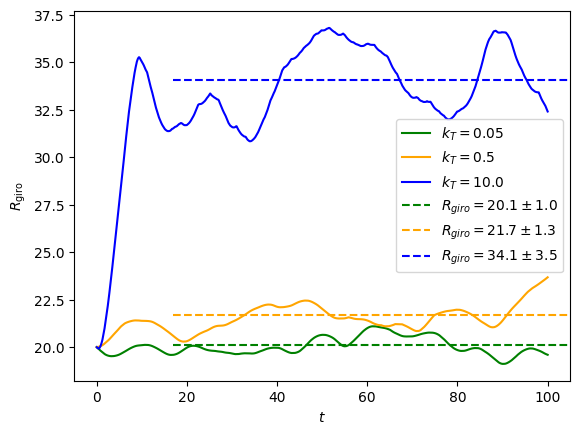

In [44]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.loadtxt("datos.dat")
n_datos = datos.shape[0] // 3
datos_sol = datos[:n_datos, :]
datos_liq = datos[n_datos : 2 * n_datos, :]
datos_gas = datos[2 * n_datos : 3 * n_datos, :]
R_giro = np.zeros((3, 2))
for i, datos_i in enumerate([datos_sol, datos_liq, datos_gas]):
    cond = datos_i[:, 0] > 20
    R_giro[i, :] = [np.mean(datos_i[cond, 1]), 2 * np.std(datos_i[cond, 1])]


fig, ax = plt.subplots()
ax.plot(datos_sol[:, 0], datos_sol[:, 1], label=r"$k_T = 0.05$", color="green")
ax.plot(datos_liq[:, 0], datos_liq[:, 1], label=r"$k_T = 0.5$", color="orange")
ax.plot(datos_gas[:, 0], datos_gas[:, 1], label=r"$k_T = 10.0$", color="blue")

ax.axhline(
    R_giro[0, 0],
    xmin=0.2,
    ls="--",
    color="green",
    label=rf"$R_{{giro}} = {R_giro[0,0]:.1f} \pm {R_giro[0,1]:.1f}$",
)
ax.axhline(
    R_giro[1, 0],
    xmin=0.2,
    ls="--",
    color="orange",
    label=rf"$R_{{giro}} = {R_giro[1,0]:.1f} \pm {R_giro[1,1]:.1f}$",
)
ax.axhline(
    R_giro[2, 0],
    xmin=0.2,
    ls="--",
    color="blue",
    label=rf"$R_{{giro}} = {R_giro[2,0]:.1f} \pm {R_giro[2,1]:.1f}$",
)

ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$R_{{\mathrm{giro}}}$")
ax.legend()

# 5. Pila de Arena

Una pila de arena se puede construir arrojando granos uno a uno sobre una superficie, hasta formar un cono. En teoría, el ángulo $\theta$ que forma la superficie del cono con la horizontal -que se conoce con el nombre de ángulo de
reposo - debe ser tal que su tangente sea igual al coeficiente de fricción estático $\mu = \tan \theta$,

## **a.**
Construya un programa basado en el código Granos2D_2024-I.cpp que genere
una pila de arena, soltando grano por grano desde cierta altura. Para ello, utilice un espacio de simulación de, por ejemplo, $L_x=160$ y $L_y=60$ y represente el suelo como un conjunto de $N_s=80$ esferas de radio $R_s=L_x/(2*N_s)=1$ que no se mueven ni interactúan entre sí ni con las otras tres paredes, como muestra la figura (si lo ve conveniente, puede ampliar $L_x$ y/o $N$ aún más). Haga que todos los $N = 200$ granos inicien con una posición $x_0=L_x/2$, $y_0=L_y-2R_0$, con $R_0=2$, velocidad $V_x=V_y=0$, ángulo ```theta0 = 0``` y una velocidad angular omega que se escoge aleatoriamente en el intervalo ``` theta ``` $\in [−\theta_{max},\theta_{max}]$, pero vaya soltándolos uno por uno, dejando evolucionar el sistema un tiempo $t_{max} =  5\sqrt{Ly/g}$ antes de soltar el siguiente. Una forma de lograrlo es iniciar todos los granos antes de comenzar la simulación y definir una variable entera ```Nlive = 0,1,2,...``` que indica cuántos granos están vivos. Para la simulación puede tomar como valores de referencia los siguientes:

In [45]:
%%writefile Granos2D.cpp

#include <iostream>
#include <cmath>
#include "vector.h"
#include "Random64.h"

using namespace std;

// Constantes problema físico
const double Lx = 160, Ly = 60;
const int N = 220, Ns = 80; const int Ntot = N + Ns + 3;
const double KHertz = 1.0e4, g=9.8, Gamma = 150, Kcundall = 500, mu = 0.4;

// Constantes del algoritmo

const double xi=0.1786178958448091;
const double lambda=-0.2123418310626054;
const double chi=-0.06626458266981849;
const double Um2lambdaU2 = (1 - 2 * lambda) / 2;
const double Um2chiplusxi = 1 - 2 * (chi + xi);

// Declaración de la clase

class Cuerpo;
class Colisionador;

// Declaración de las interfases de las clases

class Cuerpo{
    private:
        vector3D r, V, F;
        double m, R;
        double theta, omega, tau, I;
    public:
        void Inicie(double x0, double y0, double Vx0, double Vy0, double m0,
        double theta0, double omega0, double R0);
        void BorreFuerza(void){F.load(0.0, 0.0, 0.0); tau=0;};
        void SumeFuerza(vector3D dF, double dtau){F += dF; tau += dtau;};
        void Mueva_r(double dt, double coeff){r+=V*(coeff * dt);theta+=omega*(coeff*dt);};
        void Mueva_V(double dt, double coeff){V+=F*(coeff * dt / m);omega+=tau*(coeff*dt/I);};
        void Dibujese(void);
        double Getx(void){return r.x();};
        double Gety(void){return r.y();};
        double Gettheta(void){return theta;};
        friend class Colisionador;
};

class Colisionador{
    private:
        double xCundall[Ntot][Ntot],sold[Ntot][Ntot];
    public:
        void Inicie(void);
        void CalculeFuerzasEntre(Cuerpo &Grano1, Cuerpo &Grano2, double &xCundall, double &sold, double dt);
        void CalculeTodasLasFuerzas(Cuerpo * Granos, double dt, double Nlive);
};

// --------- Funciones de la clase cuerpo ------------

void Cuerpo::Inicie(double x0, double y0, double Vx0, double Vy0, double m0,
            double theta0, double omega0, double R0){
    r.load(x0, y0, 0); V.load(Vx0, Vy0, 0); m = m0; R = R0;
    theta = theta0; omega = omega0;   I = 2.0 / 5.0 * m * R * R;
}

// --------- Funciones de la clase Colisionador --------
void Colisionador::Inicie(void){
  int i,j; //j>i
  for(i=0;i<Ntot;i++)
    for(j=0;j<Ntot;j++)
      xCundall[i][j]=sold[i][j]=0;
}

void Colisionador::CalculeFuerzasEntre(Cuerpo &Grano1, Cuerpo &Grano2,
                                       double &xCundall, double &sold, double dt){
    // Calcular el vector normal
    vector3D r21 = Grano2.r - Grano1.r; double d = r21.norm();
    double R1 = Grano1.R, R2 = Grano2.R;
    double s = R1 + R2 - d;

    // Si hay contacto
    if(s > 0){
        double Fn;

        //Vectores unitarios
        vector3D n=r21*(1.0/d),t,k; t.load(n.y(),-n.x(),0); k.load(0,0,1);

        // Calculo la velocidad de contacto
        vector3D Rw; Rw.load(0, 0, R2*Grano2.omega + R1*Grano1.omega);
        vector3D Vc = (Grano2.V - Grano1.V) - (Rw ^ n);
        double Vn = Vc * n, Vt = Vc * t;

        // Calculo la fuerza normal (Hertz, Kuramoto-Kano)
        double m1 = Grano1.m, m2 = Grano2.m; double m12 = (m1 * m2) / (m1 + m2);
        Fn = (KHertz * pow(s, 1.5)) - Gamma * sqrt(s) * m12*Vn;

        // Calculo la fuerza tangencial (Cundall)

        xCundall += Vt*dt; double Ft = -Kcundall * xCundall; double Ftmax = mu * fabs(Fn);
        if(fabs(Ft)>Ftmax) Ft = Ft / fabs(Ft) * Ftmax;

        // Calculo y cargue las fuerzas
        vector3D F1, F2; double tau1, tau2;
        F2 = n*Fn + t*Ft; tau2 = ((n*(-R2))^F2)*k; F1 = -1*F2; tau1 = ((n*R1)^F1)*k;

        Grano2.SumeFuerza(F2,tau2); Grano1.SumeFuerza(-1*F2, tau1);
    }
    if(sold >= 0 &&  s<0) xCundall = 0;
    sold = s;
}

void Colisionador::CalculeTodasLasFuerzas(Cuerpo * Grano, double dt, double Nlive){
    int i, j;
    // Borro las fuerzas de todos los Granos
    for(i=0; i<Ntot; i++){
        Grano[i].BorreFuerza();
    }
    vector3D g_vec; g_vec.load(0, -g, 0);
    for(i=0; i<Nlive; i++){
        Grano[i].SumeFuerza(Grano[i].m*g_vec,0);
    }
    // Recorro por parejas, calculo la fuerza de cada pareja y se la sumo a los dos
    for(i=0; i<Nlive; i++)
        for(j=i+1; j<Nlive; j++)
            CalculeFuerzasEntre(Grano[i],Grano[j], xCundall[i][j], sold[i][j], dt);

    // Fuerza por, calculo la fuerza de cada pareja y se la sumo a los dos
    for(i=0; i<Nlive; i++)
        for(j=N; j<Ntot; j++)
            CalculeFuerzasEntre(Grano[i],Grano[j], xCundall[i][j], sold[i][j], dt);

}

int main(){

    Cuerpo Grano[Ntot];
    Colisionador Hertz;
    Crandom ran64(1);

    // Parametros de la simulación

    double m0 = 1.0; double R0 = 2.0;
    double kT = 10, V0 = sqrt(2*kT / m0);
    double x0 = Lx / 2, y0 = Ly-2*R0, Vx0 = 0, Vy0 = 0;
    double omega0, omegaMax = 8.0, theta0 = 0;
    double t, dt = 1e-2, tmax = 5*sqrt(Ly/g);
    double Rpared = 100*Lx, Mpared = 100*m0;
    double Rx = Lx/(2*Ns), dx = 2*Rx;
    int i, Nlive;

    // INICIO

    Hertz.Inicie();

    // Inicializar las paredes
    // double x0, double y0, double Vx0, double Vy0, double m0, double theta0, double omega0, double R0
    Grano[N+Ns].Inicie(Lx/2, Ly + Rpared, 0, 0, Mpared, 0, 0, Rpared); // Arirba
    Grano[N+Ns+1].Inicie(Lx/2, -Rpared, 0, 0, Mpared, 0, 0, Rpared); // Abajo
    Grano[N+Ns+2].Inicie(Lx + Rpared, Ly/2, 0, 0, Mpared, 0, 0, Rpared); // Derecha

    // Inicializar el piso
    for(i=0; i<Ns; i++){
        Grano[N+i].Inicie(Rx + i*dx, 0, 0, 0, m0, 0, 0, Rx);
    }

    for(Nlive = 1; Nlive <= N; Nlive+=1){
        omega0 = 2 * (ran64.r()-0.5) * omegaMax;
        Grano[Nlive-1].Inicie(x0, y0, Vx0, Vy0, m0, theta0, omega0, R0);

        for(t = 0; t < tmax; t+=dt){

            //for(int i=0; i<N-1; n++){
            //    cout << Grano[i].Getx() << " " << Grano[i].Gety() << " " << Grano[i].Gettheta() << " ";
            //}
            //cout << Grano[N-1].Getx() << " " << Grano[N-1].Gety() << " " << Grano[N-1].Gettheta() << endl;

            for(i=0; i<N; i++) Grano[i].Mueva_r(dt, xi);
            Hertz.CalculeTodasLasFuerzas(Grano, dt, Nlive); for(i=0; i<N; i++) Grano[i].Mueva_V(dt, Um2lambdaU2);
            for(i=0; i<N; i++) Grano[i].Mueva_r(dt, chi);
            Hertz.CalculeTodasLasFuerzas(Grano, dt, Nlive); for(i=0; i<N; i++) Grano[i].Mueva_V(dt, lambda);
            for(i=0; i<N; i++) Grano[i].Mueva_r(dt, Um2chiplusxi);
            Hertz.CalculeTodasLasFuerzas(Grano, dt, Nlive); for(i=0; i<N; i++) Grano[i].Mueva_V(dt, lambda);
            for(i=0; i<N; i++) Grano[i].Mueva_r(dt, chi);
            Hertz.CalculeTodasLasFuerzas(Grano, dt, Nlive); for(i=0; i<N; i++) Grano[i].Mueva_V(dt, Um2lambdaU2);
            for(i=0; i<N; i++) Grano[i].Mueva_r(dt, xi);
        }
    }
    for(int i=0; i<N-1; i++){
        cout << Grano[i].Getx() << " " << Grano[i].Gety() << " " << Grano[i].Gettheta() << " ";
    }
    cout << Grano[N-1].Getx() << " " << Grano[N-1].Gety() << " " << Grano[N-1].Gettheta() << endl;
    return 0;
}

Overwriting Granos2D.cpp


In [46]:
%%bash

g++ Granos2D.cpp -O3
./a.out > datos.dat

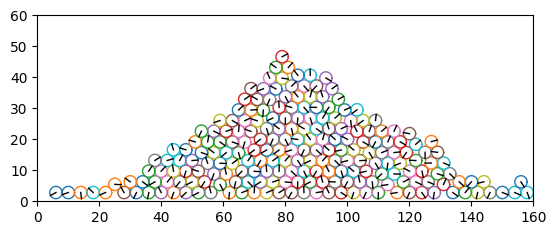

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation

plt.rcParams["animation.html"] = "html5"
plt.rcParams["figure.dpi"] = 100

datos = np.loadtxt("datos.dat")

Nframes = 1
n_datos = datos.shape[0]

Lx = 160
Ly = 60
N = 220
Ns = 80
Ntot = N + Ns + 3
r = 2
theta = np.linspace(0, 2 * np.pi, 20)

fig, ax = plt.subplots()
ax.set_xlim([0, Lx])
ax.set_ylim([0, Ly])
ax.set_aspect("equal")


MoleculaCirculo = [ax.plot([], [], lw=1)[0] for i in range(N)]
MoleculaLinea = [ax.plot([], [], "k", lw=1)[0] for i in range(N)]

for i in range(N):
    x0 = datos[3 * i]
    y0 = datos[3 * i + 1]
    theta0 = datos[3 * i + 2]
    MoleculaCirculo[i].set_data(x0 + r * np.cos(theta), y0 + r * np.sin(theta))
    MoleculaLinea[i].set_data(
        x0 + r * np.cos(theta0) * theta / (2 * np.pi),
        y0 + r * np.sin(theta0) * theta / (2 * np.pi),
    )


# def init():
#     return []

# def animate(t):
#     for i in range(N):
#         x0 = datos[t * n_datos // Nframes, 3*i]
#         y0 = datos[t * n_datos // Nframes, 3*i+1]
#         theta0 = datos[t * n_datos // Nframes, 3*i+2]
#         MoleculaCirculo[i].set_data(x0 + r*np.cos(theta),y0 + r*np.sin(theta))
#         MoleculaLinea[i].set_data(x0 + r*np.cos(theta0)*theta/(2*np.pi),y0 + r*np.sin(theta0)*theta/(2*np.pi))
#     return tuple(MoleculaCirculo) + tuple(MoleculaLinea)

# anim = FuncAnimation(fig, animate, init_func=init, frames=Nframes, interval=30, blit=True)
# anim

## **b.**

Una vez se complete la pila, ajuste dos líneas a sus perfiles, como muestra la
figura, y mida su ángulo de inclinación, que corresponde al ángulo de reposo $\theta$, y compruebe si se cumple la relación Ec. (1). Si lo desea, tome $\theta = (\theta_1 + \theta_2)/2$, con $\theta_1$ y $\theta_2$ los ángulos medidos a derecha e izquierda, como se muestra en la figura.

In [48]:
datos = datos.reshape((-1, 3))
max_y = np.where(datos[:, 1] == np.max(datos, axis=0)[1])[0][0]
h = datos[max_y, 1]
l1 = datos[max_y, 0] - 44
l2 = 140 - datos[max_y, 0]

theta1 = np.arctan2(h, l1)
theta2 = np.arctan2(h, l2)

theta = 0.5 * (theta1 + theta2)
dtheta = 0.5 * np.abs(theta1 - theta2)
np.tan(theta) - 0.4

np.float64(0.6088565351909917)

## **c.**

Ahora repita todo el proceso anterior, pero haciendo que cada grano que se suelta tenga un radio escogido al azar entre 1.6 y 2.4 ( $R_0 \in [1.6 , 2.4]$). Observe si en este caso el ángulo $\theta = (\theta_1 + \theta_2)/2$ se acerca más o no al valor predicho por la Ec. (1).

In [49]:
%%writefile Granos2D.cpp

#include <iostream>
#include <cmath>
#include "vector.h"
#include "Random64.h"

using namespace std;

// Constantes problema físico
const double Lx = 160, Ly = 60;
const int N = 200, Ns = 80; const int Ntot = N + Ns + 3;
const double KHertz = 1.0e4, g=9.8, Gamma = 150, Kcundall = 500, mu = 0.4;

// Constantes del algoritmo

const double xi=0.1786178958448091;
const double lambda=-0.2123418310626054;
const double chi=-0.06626458266981849;
const double Um2lambdaU2 = (1 - 2 * lambda) / 2;
const double Um2chiplusxi = 1 - 2 * (chi + xi);

// Declaración de la clase

class Cuerpo;
class Colisionador;

// Declaración de las interfases de las clases

class Cuerpo{
    private:
        vector3D r, V, F;
        double m;
        double theta, omega, tau, I;
    public:
        double R;
        void Inicie(double x0, double y0, double Vx0, double Vy0, double m0,
        double theta0, double omega0, double R0);
        void BorreFuerza(void){F.load(0.0, 0.0, 0.0); tau=0;};
        void SumeFuerza(vector3D dF, double dtau){F += dF; tau += dtau;};
        void Mueva_r(double dt, double coeff){r+=V*(coeff * dt);theta+=omega*(coeff*dt);};
        void Mueva_V(double dt, double coeff){V+=F*(coeff * dt / m);omega+=tau*(coeff*dt/I);};
        void Dibujese(void);
        double Getx(void){return r.x();};
        double Gety(void){return r.y();};
        double Gettheta(void){return theta;};
        friend class Colisionador;
};

class Colisionador{
    private:
        double xCundall[Ntot][Ntot],sold[Ntot][Ntot];
    public:
        void Inicie(void);
        void CalculeFuerzasEntre(Cuerpo &Grano1, Cuerpo &Grano2, double &xCundall, double &sold, double dt);
        void CalculeTodasLasFuerzas(Cuerpo * Granos, double dt, double Nlive);
};

// --------- Funciones de la clase cuerpo ------------

void Cuerpo::Inicie(double x0, double y0, double Vx0, double Vy0, double m0,
            double theta0, double omega0, double R0){
    r.load(x0, y0, 0); V.load(Vx0, Vy0, 0); m = m0; R = R0;
    theta = theta0; omega = omega0;   I = 2.0 / 5.0 * m * R * R;
}

// --------- Funciones de la clase Colisionador --------
void Colisionador::Inicie(void){
  int i,j; //j>i
  for(i=0;i<Ntot;i++)
    for(j=0;j<Ntot;j++)
      xCundall[i][j]=sold[i][j]=0;
}

void Colisionador::CalculeFuerzasEntre(Cuerpo &Grano1, Cuerpo &Grano2,
                                       double &xCundall, double &sold, double dt){
    // Calcular el vector normal
    vector3D r21 = Grano2.r - Grano1.r; double d = r21.norm();
    double R1 = Grano1.R, R2 = Grano2.R;
    double s = R1 + R2 - d;

    // Si hay contacto
    if(s > 0){
        double Fn;

        //Vectores unitarios
        vector3D n=r21*(1.0/d),t,k; t.load(n.y(),-n.x(),0); k.load(0,0,1);

        // Calculo la velocidad de contacto
        vector3D Rw; Rw.load(0, 0, R2*Grano2.omega + R1*Grano1.omega);
        vector3D Vc = (Grano2.V - Grano1.V) - (Rw ^ n);
        double Vn = Vc * n, Vt = Vc * t;

        // Calculo la fuerza normal (Hertz, Kuramoto-Kano)
        double m1 = Grano1.m, m2 = Grano2.m; double m12 = (m1 * m2) / (m1 + m2);
        Fn = (KHertz * pow(s, 1.5)) - Gamma * sqrt(s) * m12*Vn;

        // Calculo la fuerza tangencial (Cundall)

        xCundall += Vt*dt; double Ft = -Kcundall * xCundall; double Ftmax = mu * fabs(Fn);
        if(fabs(Ft)>Ftmax) Ft = Ft / fabs(Ft) * Ftmax;

        // Calculo y cargue las fuerzas
        vector3D F1, F2; double tau1, tau2;
        F2 = n*Fn + t*Ft; tau2 = ((n*(-R2))^F2)*k; F1 = -1*F2; tau1 = ((n*R1)^F1)*k;

        Grano2.SumeFuerza(F2,tau2); Grano1.SumeFuerza(-1*F2, tau1);
    }
    if(sold >= 0 &&  s<0) xCundall = 0;
    sold = s;
}

void Colisionador::CalculeTodasLasFuerzas(Cuerpo * Grano, double dt, double Nlive){
    int i, j;
    // Borro las fuerzas de todos los Granos
    for(i=0; i<Ntot; i++){
        Grano[i].BorreFuerza();
    }
    vector3D g_vec; g_vec.load(0, -g, 0);
    for(i=0; i<Nlive; i++){
        Grano[i].SumeFuerza(Grano[i].m*g_vec,0);
    }
    // Recorro por parejas, calculo la fuerza de cada pareja y se la sumo a los dos
    for(i=0; i<Nlive; i++)
        for(j=i+1; j<Nlive; j++)
            CalculeFuerzasEntre(Grano[i],Grano[j], xCundall[i][j], sold[i][j], dt);

    // Fuerza por, calculo la fuerza de cada pareja y se la sumo a los dos
    for(i=0; i<Nlive; i++)
        for(j=N; j<Ntot; j++)
            CalculeFuerzasEntre(Grano[i],Grano[j], xCundall[i][j], sold[i][j], dt);

}

int main(){

    Cuerpo Grano[Ntot];
    Colisionador Hertz;
    Crandom ran64(1);

    // Parametros de la simulación

    double m0 = 1.0; double R0 = 2.0;
    double kT = 10.0, V0 = sqrt(2*kT / m0);
    double x0 = Lx / 2.0, y0 = Ly-2*R0, Vx0 = 0, Vy0 = 0;
    double omega0, omegaMax = 8.0, theta0 = 0;
    double t, dt = 1e-3, tmax = 5*sqrt(Ly/g);
    double Rpared = 100*Lx, Mpared = 100*m0;
    double Rx = Lx/(2*Ns), dx = 2*Rx;
    int i, Nlive;

    // INICIO

    Hertz.Inicie();

    // Inicializar las paredes
    // double x0, double y0, double Vx0, double Vy0, double m0, double theta0, double omega0, double R0
    Grano[N+Ns].Inicie(Lx/2, Ly + Rpared, 0, 0, Mpared, 0, 0, Rpared); // Arirba
    Grano[N+Ns+1].Inicie(Lx/2, -Rpared, 0, 0, Mpared, 0, 0, Rpared); // Abajo
    Grano[N+Ns+2].Inicie(Lx + Rpared, Ly/2, 0, 0, Mpared, 0, 0, Rpared); // Derecha

    // Inicializar el piso
    for(i=0; i<Ns; i++){
        Grano[N+i].Inicie(Rx + i*dx, 0, 0, 0, m0, 0, 0, Rx);
    }

    for(Nlive = 1; Nlive <= N; Nlive+=1){
        omega0 = 2 * (ran64.r()-0.5) * omegaMax;
        R0 = 2.0 + 2 * (ran64.r()-0.5) * 0.4;
        Grano[Nlive-1].Inicie(x0, y0, Vx0, Vy0, m0, theta0, omega0, R0);

        for(t = 0; t < tmax; t+=dt){

            //for(int i=0; i<N-1; n++){
            //    cout << Grano[i].Getx() << " " << Grano[i].Gety() << " " << Grano[i].Gettheta() << " ";
            //}
            //cout << Grano[N-1].Getx() << " " << Grano[N-1].Gety() << " " << Grano[N-1].Gettheta() << endl;

            for(i=0; i<N; i++) Grano[i].Mueva_r(dt, xi);
            Hertz.CalculeTodasLasFuerzas(Grano, dt, Nlive); for(i=0; i<N; i++) Grano[i].Mueva_V(dt, Um2lambdaU2);
            for(i=0; i<N; i++) Grano[i].Mueva_r(dt, chi);
            Hertz.CalculeTodasLasFuerzas(Grano, dt, Nlive); for(i=0; i<N; i++) Grano[i].Mueva_V(dt, lambda);
            for(i=0; i<N; i++) Grano[i].Mueva_r(dt, Um2chiplusxi);
            Hertz.CalculeTodasLasFuerzas(Grano, dt, Nlive); for(i=0; i<N; i++) Grano[i].Mueva_V(dt, lambda);
            for(i=0; i<N; i++) Grano[i].Mueva_r(dt, chi);
            Hertz.CalculeTodasLasFuerzas(Grano, dt, Nlive); for(i=0; i<N; i++) Grano[i].Mueva_V(dt, Um2lambdaU2);
            for(i=0; i<N; i++) Grano[i].Mueva_r(dt, xi);
        }
    }
    for(int i=0; i<N-1; i++){
        cout << Grano[i].Getx() << " " << Grano[i].Gety() << " " << Grano[i].Gettheta() << " " << Grano
        [i].R << " ";
    }
    cout << Grano[N-1].Getx() << " " << Grano[N-1].Gety() << " " << Grano[N-1].Gettheta() << " " << Grano[i].R << endl;
    return 0;
}

Overwriting Granos2D.cpp


In [50]:
%%bash

g++ Granos2D.cpp -O3
./a.out > datos.dat

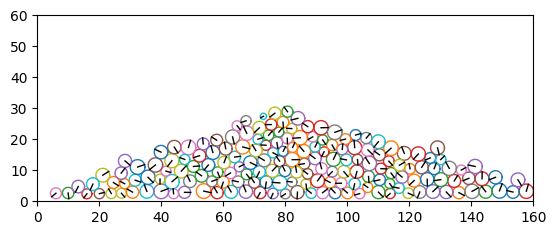

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation

plt.rcParams["animation.html"] = "html5"
plt.rcParams["figure.dpi"] = 100

datos = np.loadtxt("datos.dat")

Nframes = 1
n_datos = datos.shape[0]

Lx = 160
Ly = 60
N = 200
Ns = 80
Ntot = N + Ns + 3
theta = np.linspace(0, 2 * np.pi, 20)

fig, ax = plt.subplots()
ax.set_xlim([0, Lx])
ax.set_ylim([0, Ly])
ax.set_aspect("equal")


MoleculaCirculo = [ax.plot([], [], lw=1)[0] for i in range(N)]
MoleculaLinea = [ax.plot([], [], "k", lw=1)[0] for i in range(N)]

for i in range(N):
    x0 = datos[4 * i]
    y0 = datos[4 * i + 1]
    theta0 = datos[4 * i + 2]
    r = datos[4 * i + 3]
    MoleculaCirculo[i].set_data(x0 + r * np.cos(theta), y0 + r * np.sin(theta))
    MoleculaLinea[i].set_data(
        x0 + r * np.cos(theta0) * theta / (2 * np.pi),
        y0 + r * np.sin(theta0) * theta / (2 * np.pi),
    )


# def init():
#     return []

# def animate(t):
#     for i in range(N):
#         x0 = datos[t * n_datos // Nframes, 3*i]
#         y0 = datos[t * n_datos // Nframes, 3*i+1]
#         theta0 = datos[t * n_datos // Nframes, 3*i+2]
#         MoleculaCirculo[i].set_data(x0 + r*np.cos(theta),y0 + r*np.sin(theta))
#         MoleculaLinea[i].set_data(x0 + r*np.cos(theta0)*theta/(2*np.pi),y0 + r*np.sin(theta0)*theta/(2*np.pi))
#     return tuple(MoleculaCirculo) + tuple(MoleculaLinea)

# anim = FuncAnimation(fig, animate, init_func=init, frames=Nframes, interval=30, blit=True)
# anim

In [52]:
datos = datos.reshape((-1, 4))
max_y = np.where(datos[:, 1] == np.max(datos, axis=0)[1])[0][0]
h = datos[max_y, 1]
l1 = datos[max_y, 0] - 0
l2 = 160 - datos[max_y, 0]

theta1 = np.arctan2(h, l1)
theta2 = np.arctan2(h - 5, l2)

theta = 0.5 * (theta1 + theta2)
dtheta = 0.5 * np.abs(theta1 - theta2)
np.tan(theta) - 0.4

np.float64(-0.07035184854171694)